<a href="https://colab.research.google.com/github/raulanegro/Chouse/blob/TP-Final/Notebook_Final_Raul_Negro_version3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###<big> Análisis de Ausentismo en Logística Pedro

# Importaciones e Instalaciones

In [431]:

#Importaciones generales

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [432]:
pip install pandas


In [433]:
pip install xlrd


In [434]:
pip install pandas seaborn matplotlib


In [435]:
pip install lightgbm

# Información Obtenida

https://archive.ics.uci.edu/dataset/445/absenteeism+at+work

# Objetivo

Predecir el tiempo de ausencia en un lugar de trabajo.

# Atributos del Data Frame

1. Identificación individual (ID)

2. Razón de ausencia (CIE). Ausencias certificadas por el Código Internacional de Enfermedades (CIE), estratificadas en 21 categorías (I a XXI) de la siguiente manera:

I Enfermedades infecciosas y parasitarias
II Neoplasias
III Enfermedades de la sangre y de los órganos hematopoyéticos, así como ciertos trastornos que afectan al mecanismo inmunológico
IV Enfermedades endocrinas, nutricionales y metabólicas
V Trastornos mentales y del comportamiento
VI Enfermedades del sistema nervioso
VII Enfermedades de los ojos y anexos
VIII Enfermedades del oído y apófisis mastoides
IX Enfermedades del sistema circulatorio
X Enfermedades del sistema respiratorio
XI Enfermedades del sistema digestivo
XII Enfermedades de la piel y del tejido subcutáneo
XIII Enfermedades del sistema musculoesquelético y del tejido conectivo
XIV Enfermedades del sistema genitourinario
XV Embarazo, parto y puerperio
XVI Ciertas condiciones originadas en el período perinatal
XVII Malformaciones congénitas, deformidades y anomalías cromosómicas
XVIII Síntomas, signos y hallazgos clínicos y de laboratorio anormales, no clasificados en otra parte
XIX Lesiones, intoxicaciones y otras consecuencias de causas externas
XX Causas externas de morbilidad y mortalidad
XXI Factores que influyen en el estado de salud y contacto con los servicios de salud.

Y 7 categorías sin seguimiento del paciente (CIE), consulta médica (23), donación de sangre (24), examen de laboratorio (25), ausencia injustificada (26), fisioterapia (27), consulta dental (28).

3. Mes de la ausencia
4. Día de la semana (lunes (2), martes (3), miércoles (4), jueves (5), viernes (6))
5. Estaciones del año (verano (1), otoño (2), invierno (3), primavera (4))
6. Gasto de transporte
7. Distancia desde el domicilio hasta el lugar de trabajo (kilómetros)
8. Tiempo de servicio
9. Edad
10. Carga de trabajo promedio por día
11. Objetivo de impacto
12. Fallo disciplinario (sí=1; no=0)
13. Educación (secundaria (1), graduado (2), posgrado (3), máster y doctorado (4))
14. Hijos (número de hijos)
15. Bebedor social (sí=1; no=0)
16. Fumador social (sí=1; no=0)
17. Mascotas (número de mascotas)
18. Peso
19. Altura
20. Índice de masa corporal
21. Tiempo de ausencia en horas (objetivo)

In [436]:
# Crear el DataFrame con los resultados
DF_Resultados = pd.DataFrame(columns=['MODELO','MSE', 'MAE', 'R2', 'BIAS', 'VARIANZA'])


In [437]:
# Ruta al archivo Excel en GitHub
ruta_archivo = r'https://github.com/raulanegro/Chouse/blob/b3e24c27756026dec5bd2d6412186eab8795dbbd/Absenteeism_at_work.xls?raw=true'

# Carga el archivo Excel en un DataFrame
df = pd.read_excel(ruta_archivo)


#Generar 4000 registros aleatorios
#registros_aleatorios = df.sample(n=4000, replace=True)
#df_extendido = pd.concat([df, registros_aleatorios], ignore_index=True)

#df=df_extendido
#Concatenar los registros aleatorios al DataFrame original
df_extendido = df

for _ in range(2):
    df_extendido = pd.concat([df, df_extendido], ignore_index=True)
    df = df_extendido.copy()  # Actualizando df para que contenga el DataFrame extendido

# Convierte los valores en la columna 'Son' mayores que 0 a 1
df['Son'] = df['Son'].apply(lambda x: 1 if x > 0 else x)

df['Pet'] = df['Pet'].apply(lambda x: 1 if x > 0 else x)

df['Month of absence'] = df['Month of absence'].apply(lambda x: 6 if x == 0 else int(x))

df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,...,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000
mean,18.017568,19.216216,6.348649,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,0.597297,0.567568,0.072973,0.378378,79.035135,172.114865,26.677027,6.924324
std,11.015659,8.429130,3.410825,1.420954,1.111267,66.918275,14.829265,4.382650,6.475487,39038.311514,...,0.226163,0.672897,0.490525,0.495497,0.260136,0.485065,12.876678,6.031934,4.283279,13.324239
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,108.000000,196.000000,38.000000,120.000000


In [438]:

# Reemplazar valores en blanco por NaN
df_sin_blancos = df.replace(r'^\s*$', np.nan, regex=True)

# Contar cuántas columnas tienen valores nulos o en blanco
columnas_con_nulos_o_blancos = (df_sin_blancos.isnull().sum(axis=0) > 0).sum()

# Mostrar el número de columnas con valores nulos o en blanco
print("Número de columnas con valores nulos o en blanco:", columnas_con_nulos_o_blancos)



Número de columnas con valores nulos o en blanco: 0


In [439]:
# Contar cuántas filas tienen un valor mayor que 0 en la columna 'Disciplinary failure'
contador_disciplinary_failure = (df['Disciplinary failure'] > 0).sum()

# Mostrar el resultado
print("Número de filas con 'Disciplinary failure' mayor a 0:", contador_disciplinary_failure)

Número de filas con 'Disciplinary failure' mayor a 0: 160


Vamos a desconsiderar los valores ID, que falte por un tema disiplinario y el target.

In [440]:
#df_nuevo_1 = df

# Suponiendo que ya tienes un DataFrame llamado df_nuevo_1
#df_nuevo_1 = df_filtrado.drop(['Age','Transportation expense','Distance from Residence to Work','ID', 'Reason for absence', 'Disciplinary failure', 'Hit target', 'Body mass index', 'Service time', 'Social drinker', 'Social smoker', 'Seasons', 'Height','Work load Average/day ','Pet','Weight'], axis=1)

df_filtrado = df[df['Disciplinary failure'] == 0]

df_nuevo_1 = df_filtrado.drop(['ID', 'Disciplinary failure', 'Hit target'], axis=1)


df_nuevo_1.shape
# Imprimir el nuevo DataFrame
#print(df_nuevo_1)


(2800, 18)

# Análisis de datos


In [441]:
df_nuevo_1.dtypes

Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

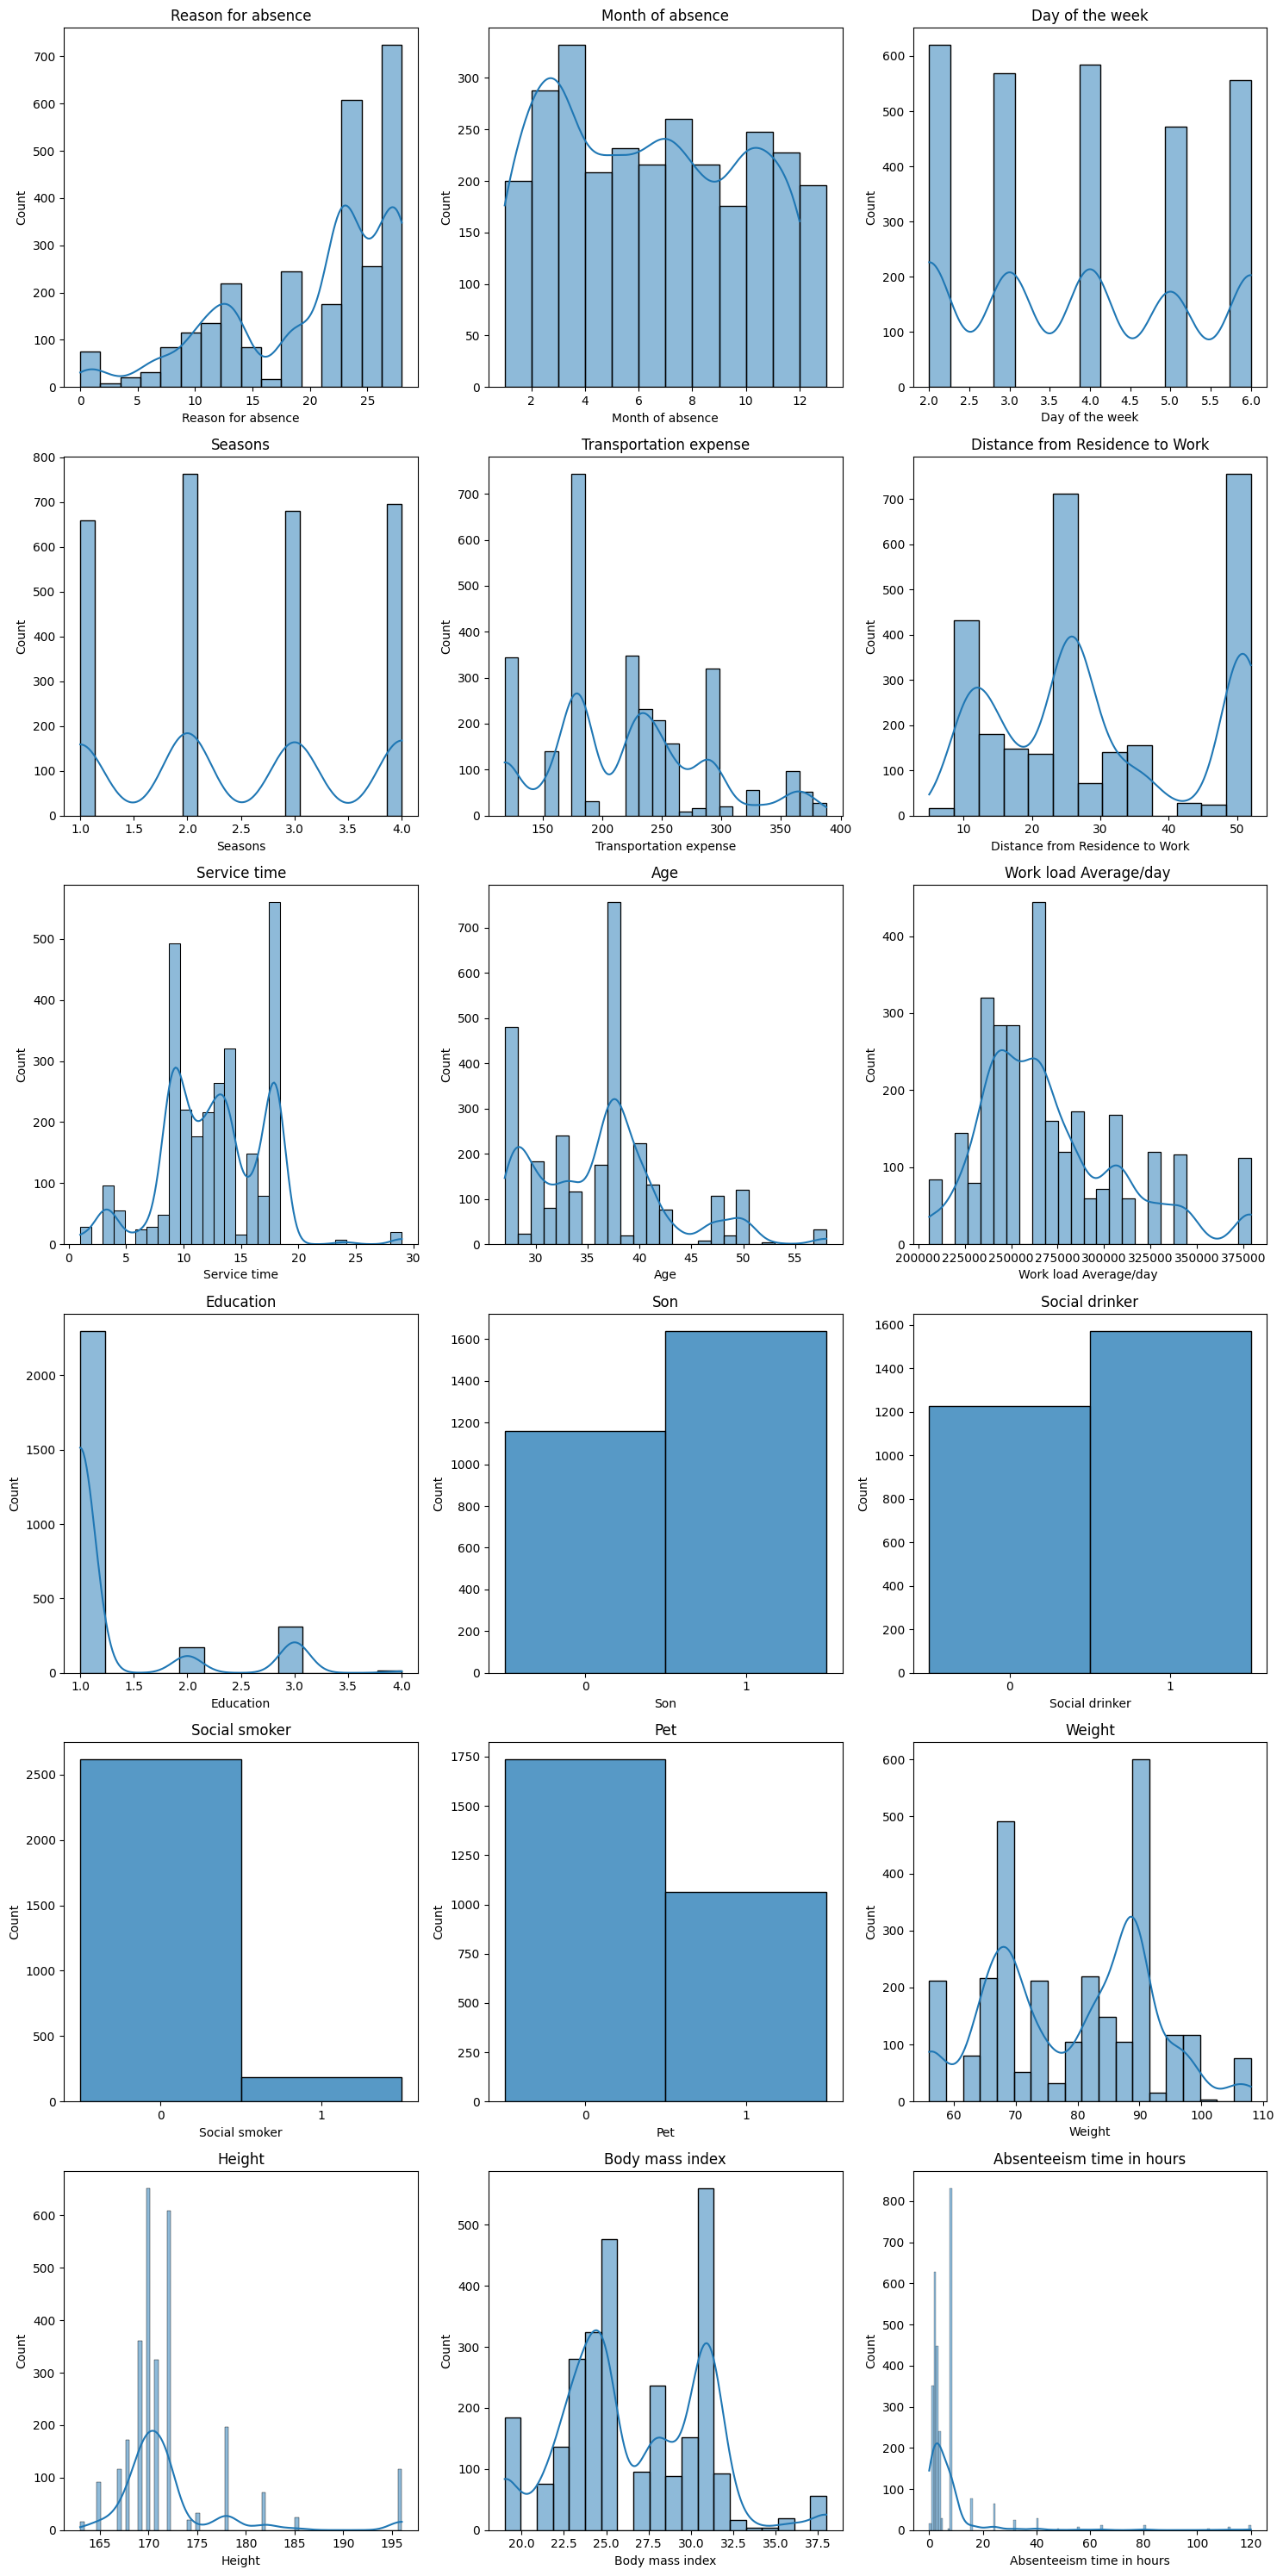

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el número de columnas para mostrar en cada fila
num_columnas_por_fila = 3

# Calcular el número total de subgráficos y filas
num_subgraficos = len(df_nuevo_1.columns)
num_filas = (num_subgraficos - 1) // num_columnas_por_fila + 1

# Configurar el tamaño del lienzo
plt.figure(figsize=(15, 5 * num_filas))

# Iterar sobre cada columna y crear un histograma
for i, columna in enumerate(df_nuevo_1.columns):
    plt.subplot(num_filas, num_columnas_por_fila, i + 1)

    # Verificar si la columna es 'Son' o 'Pet'
    if columna in ['Son', 'Pet', 'Social drinker','Social smoker']:
        sns.histplot(df_nuevo_1[columna], bins=[-0.5, 0.5, 1.5], kde=False, discrete=True)  # Escala de 0 y 1
        plt.xticks([0, 1], ['0', '1'])  # Establecer los ticks del eje x como números enteros
    elif columna == 'Month of absence':
        sns.histplot(df_nuevo_1[columna], bins=range(1, 14), kde=True)  # Escala de 1 a 13 para meses
    elif columna == 'Day of Week':
        sns.histplot(df_nuevo_1[columna], bins=range(0, 8), kde=True, discrete=True)  # Escala de 0 a 7 para días de la semana
        plt.xticks(range(7))  # Establecer los ticks del eje x como números enteros de 0 a 6
    else:
        sns.histplot(df_nuevo_1[columna], kde=True)
    plt.title(columna)

# Ajustar el diseño para evitar la superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()



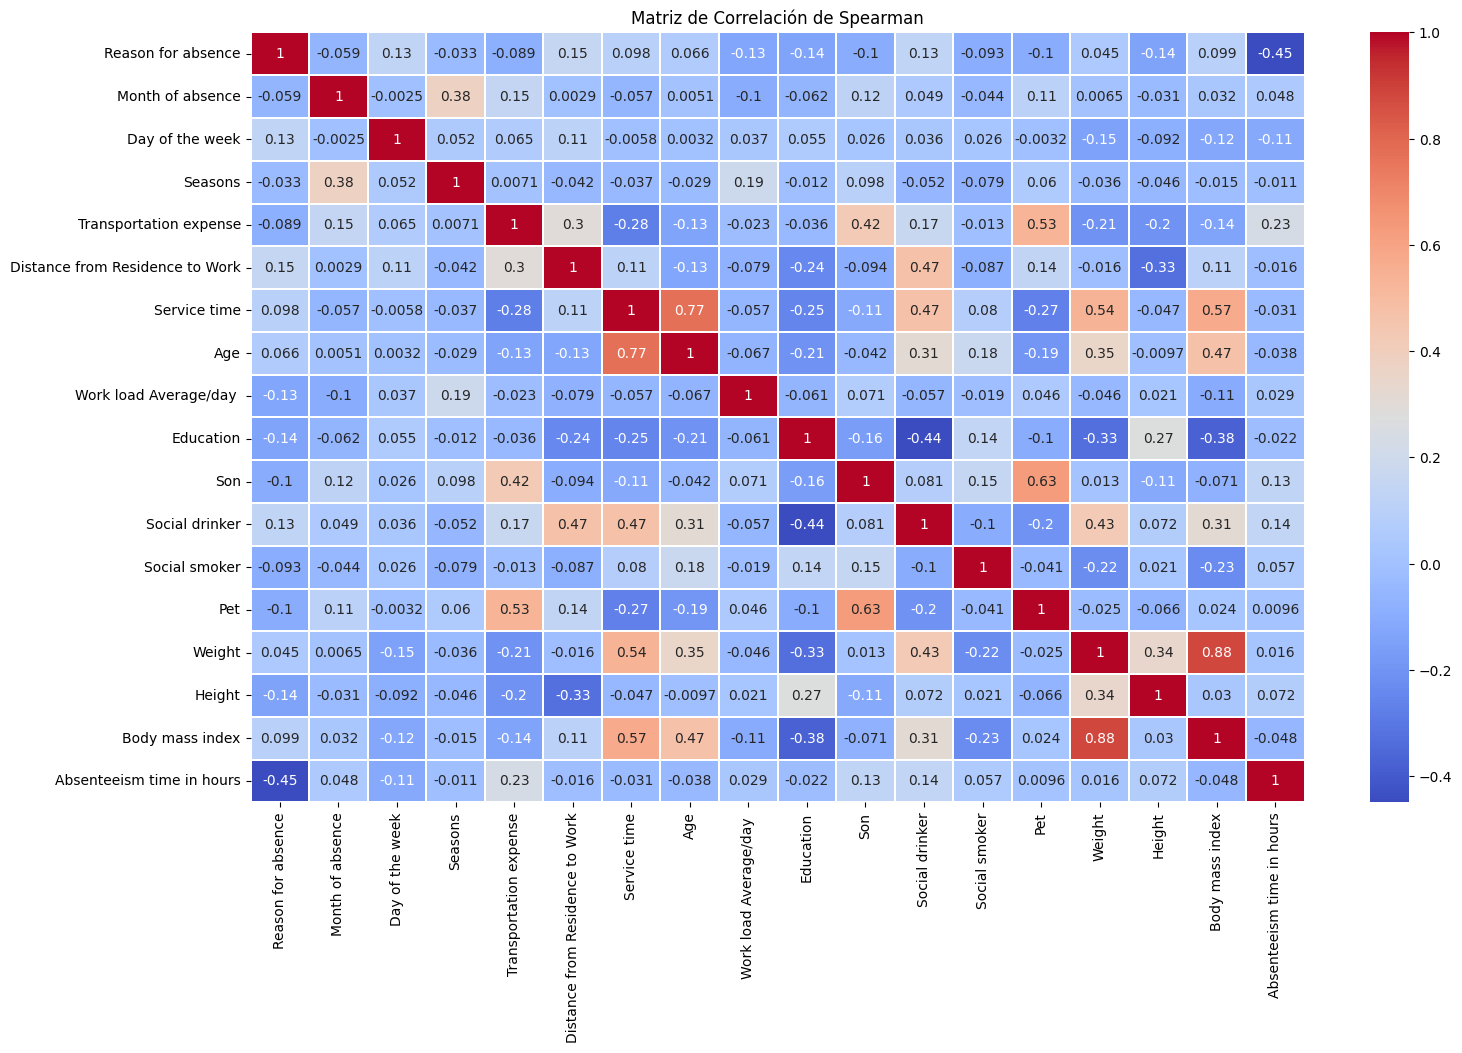

In [443]:
# Se genera un mapa de calor para entender la correlacion

# Calcular la matriz de correlación de Spearman
correlation_matrix = df_nuevo_1.corr(method="spearman")

# Crear un mapa de calor
plt.figure(figsize=(17, 10))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.25)
plt.title('Matriz de Correlación de Spearman')
plt.show()

In [444]:
# Crear las variables X_data e y_data
X_data = df_nuevo_1.drop('Absenteeism time in hours', axis=1)
Y_data = df_nuevo_1['Absenteeism time in hours']

# Random Forest

In [445]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)

In [446]:
#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [447]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [20,30,50,100],
    'max_features': [2,4,5],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'max_depth':[3,4,5,6]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  #
                                  cv = 5,
                                  verbose = 1, # Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [448]:
grid_random_forest.fit(X_train, Y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 4, 5, 6], 'max_features': [2, 4, 5],
                         'n_estimators': [20, 30, 50, 100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [449]:
#random_forest_nuevo = RandomForestRegressor(criterion='absolute_error', max_depth=6, max_features=5,n_estimators=50)

# Asignar el mejor estimador encontrado por la búsqueda de hiperparámetros a random_forest_nuevo
random_forest_nuevo = grid_random_forest.best_estimator_

X_test1= X_test.copy()
X_test1['Prediccion']=np.round(random_forest_nuevo.predict(X_test),0)
X_test1

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Prediccion
2376,19,3,3,2,260,50,11,36,343253,1,1,1,0,0,65,168,23,8.0
349,25,12,3,4,118,10,10,37,236629,1,0,0,0,0,83,172,28,3.0
993,19,8,6,1,157,27,6,29,265615,1,0,1,1,0,75,185,22,6.0
2157,8,5,4,3,118,10,10,37,237656,1,0,0,0,0,83,172,28,6.0
2732,23,10,3,4,118,10,10,37,284853,1,0,0,0,0,83,172,28,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,11,11,2,4,118,10,10,37,284031,1,0,0,0,0,83,172,28,8.0
1007,19,8,5,1,235,11,14,37,265615,3,1,0,0,1,88,172,29,7.0
243,1,7,2,1,330,16,4,28,275312,2,0,0,0,0,84,182,25,8.0
1777,22,10,2,4,369,17,12,31,265017,1,1,1,0,0,70,169,25,8.0


In [450]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Supongamos que tienes X_data e y_data definidos
# Aquí estamos utilizando RandomForestRegressor como ejemplo de modelo
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

# Entrenar el modelo
random_forest_nuevo = RandomForestRegressor()
random_forest_nuevo.fit(X_train, Y_train)

# Crear un DataFrame con el conjunto de prueba y las predicciones redondeadas
X_test1 = X_test.copy()
X_test1['Prediccion'] = np.round(random_forest_nuevo.predict(X_test), 0)

# Agregar la columna 'Real' con los valores reales
X_test1['Real'] = Y_test.values

# Imprimir el DataFrame actualizado
X_test1

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Prediccion,Real
1159,23,4,2,3,118,13,18,50,239409,1,1,1,0,0,98,178,31,1.0,1
819,28,10,6,4,260,50,11,36,253465,1,1,1,0,0,65,168,23,3.0,3
2288,23,10,3,4,118,10,10,37,253465,1,0,0,0,0,83,172,28,3.0,3
1264,13,10,5,4,225,26,9,28,284853,1,1,0,0,1,69,169,24,1.0,1
2032,23,11,6,4,225,26,9,28,268519,1,1,0,0,1,69,169,24,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,25,6,2,1,118,10,10,37,275089,1,0,0,0,0,83,172,28,3.0,3
963,23,6,5,3,291,31,12,40,377550,1,1,1,0,1,73,171,25,4.0,4
2804,27,1,6,2,179,51,18,38,313532,1,0,1,0,0,89,170,31,2.0,2
2731,28,10,4,4,291,31,12,40,284853,1,1,1,0,1,73,171,25,2.0,2


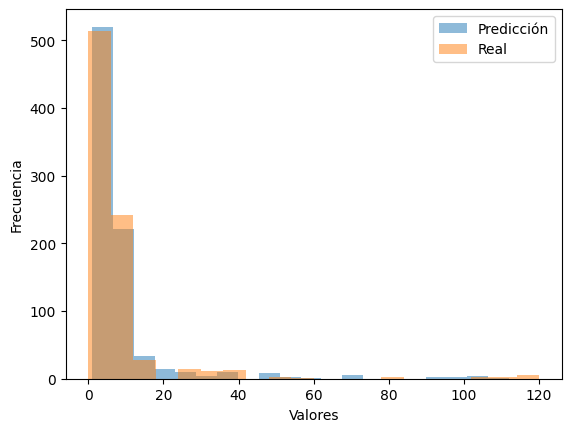

Desvío medio entre Predicción y Real: 1.6642857142857144


In [451]:
# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'

# Crear un histograma que muestre tanto las predicciones como los valores reales
plt.hist(X_test1['Prediccion'], bins=20, alpha=0.5, label='Predicción')
plt.hist(X_test1['Real'], bins=20, alpha=0.5, label='Real')

# Añadir etiquetas y leyenda
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

# Calcular el desvío entre predicciones y valores reales
desvio = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
print(f"Desvío medio entre Predicción y Real: {desvio}")

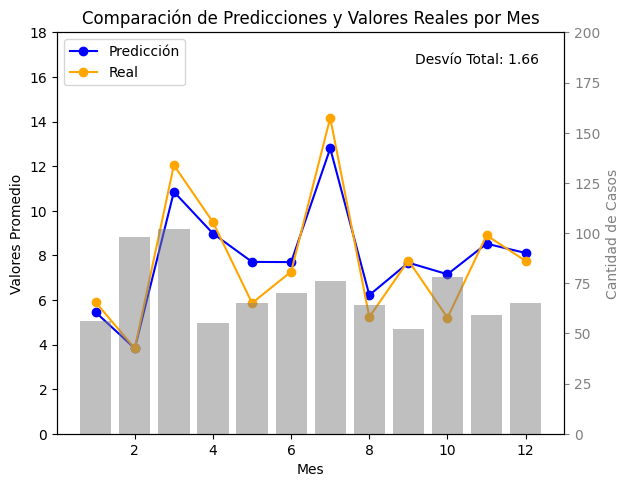

In [452]:
# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'
# y que 'Month of absence' es una columna que representa los meses en formato numérico

# Convertir la columna 'Month of absence' a formato de fecha
X_test1['Month of absence'] = pd.to_datetime(X_test1['Month of absence'], format='%m')

# Agregar una columna 'Mes' basada en la columna de fecha
X_test1['Mes'] = X_test1['Month of absence'].dt.month

# Crear un gráfico de líneas para la predicción y los valores reales
fig, ax1 = plt.subplots()

# Gráfico de líneas para la predicción y los valores reales en el primer eje y
ax1.plot(X_test1.groupby('Mes')['Prediccion'].mean(), label='Predicción', marker='o', color='blue')
ax1.plot(X_test1.groupby('Mes')['Real'].mean(), label='Real', marker='o', color='orange')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Valores Promedio', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
ax1.set_ylim(0, 18)  # Establecer límites en el eje y1

# Segundo eje y para la cantidad de casos
ax2 = ax1.twinx()
ax2.bar(X_test1.groupby('Mes')['Mes'].count().index, X_test1.groupby('Mes')['Mes'].count(), label='Casos', alpha=0.5, color='gray')
ax2.set_ylabel('Cantidad de Casos', color='gray')
ax2.tick_params('y', colors='gray')
ax2.set_ylim(0, 200)  # Establecer límites en el eje y2

# Calcular el desvío total y mostrarlo en el gráfico
desvio_total = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
plt.text(0.95, 0.95, f'Desvío Total: {desvio_total:.2f}', ha='right', va='top', transform=plt.gca().transAxes)

# Ajustar el diseño para evitar solapamientos
fig.tight_layout()

# Título del gráfico
plt.title('Comparación de Predicciones y Valores Reales por Mes')

# Mostrar el gráfico
plt.show()

In [453]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Entrenar el modelo
random_forest.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(Y_test, y_pred)
print("R-squared:", r2)



Mean Squared Error: 28.098112239783834
Mean Absolute Error: 1.6616794794053984
R-squared: 0.8809552086505519


In [454]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Crear una instancia del modelo de Random Forest
random_forest = RandomForestRegressor()

# Ajustar el modelo en el conjunto de entrenamiento
random_forest.fit(X_train, Y_train)

# Definir el número de muestras Bootstrap
n_muestras = 100

# Inicializar listas para almacenar los errores de predicción
errores_mse = []
errores_mae = []

# Generar muestras Bootstrap y evaluar el modelo en cada una
for _ in range(n_muestras):
    # Generar una muestra Bootstrap
    X_boot, Y_boot = resample(X_test, Y_test, random_state=42)

    # Realizar predicciones en la muestra Bootstrap
    y_pred = random_forest.predict(X_boot)

    # Calcular el error cuadrático medio (MSE) y el error absoluto medio (MAE)
    mse = mean_squared_error(Y_boot, y_pred)
    mae = mean_absolute_error(Y_boot, y_pred)

    # Almacenar los errores de predicción
    errores_mse.append(mse)
    errores_mae.append(mae)

# Calcular el sesgo y la varianza
sesgo = np.mean(errores_mse)
varianza = np.var(errores_mae)

print("Sesgo:", sesgo)
print("Varianza:", varianza)

DF_Resultados.loc[len(DF_Resultados)] = ["Random Forest", mse, mae, r2, sesgo, varianza]




Sesgo: 23.964915851202495
Varianza: 4.437342591868191e-31


# Regresión

In [455]:
# 2) Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [456]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [457]:
regressor.intercept_

35.29684029262642

In [458]:
# Crear el DataFrame 'coeff_df' con los coeficientes del modelo
coeff_df = pd.DataFrame(regressor.coef_, columns=['Coefficient'], index=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work','Service time', 'Age', 'Work load Average/day ', 'Education', 'Son',
       'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height','Body mass index'])

# Imprimir el DataFrame con los coeficientes
print(coeff_df)


                                 Coefficient
Reason for absence                 -0.481012
Month of absence                    0.052592
Day of the week                    -0.765127
Seasons                             0.209424
Transportation expense              0.009272
Distance from Residence to Work    -0.047807
Service time                        0.097798
Age                                 0.157938
Work load Average/day              -0.000009
Education                          -1.273743
Son                                 1.927701
Social drinker                      2.095698
Social smoker                      -2.173554
Pet                                -1.359191
Weight                              0.240878
Height                             -0.068172
Body mass index                    -1.080360


In [459]:
y_pred = regressor.predict(X_test)
y_pred

array([12.32637454,  5.29159314,  5.28577827,  8.72367687,  3.34260565,
       13.2392273 , 17.45032215,  5.28577827,  5.65833664,  4.86753718,
       12.9033308 ,  6.15194534,  5.84927357,  3.52520679,  5.43968907,
        4.25090072,  9.17247673, 15.82610409,  4.87442671,  4.50826104,
        0.94012959,  9.00947647, 14.2894136 , 12.39416164,  5.37104369,
        0.9621971 ,  4.50826104, 19.3055726 ,  3.96699843,  2.05154334,
        5.21745505, 15.79809024, 10.32842896,  2.06269619,  3.8372273 ,
        5.96859801,  7.09430847,  7.40589935, 11.70077763, 20.79252427,
        2.74314128,  5.33710842, 11.91780881,  5.0792354 ,  8.79404777,
       12.8395181 ,  7.25844059, 10.43723225, -0.20335426,  7.2959422 ,
        6.7015014 , 23.75158418, 12.00990143,  7.59600374,  6.67767493,
        4.42771925,  9.40158584,  7.40589935,  8.72896335, 10.87676994,
        5.59945939, 10.92605239,  0.06852743, 10.672707  ,  2.07388024,
        6.19759764,  7.24704371,  3.44986213, 17.1205737 ,  6.29

In [460]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
1159,1,12.326375,-11.326375,-1132.637454
819,3,5.291593,-2.291593,-76.386438
2288,3,5.285778,-2.285778,-76.192609
1264,1,8.723677,-7.723677,-772.367687
2032,2,3.342606,-1.342606,-67.130282
...,...,...,...,...
680,2,5.849274,-3.849274,-192.463679
1069,3,1.120146,1.879854,62.661788
1151,2,7.849856,-5.849856,-292.492809
748,40,15.993186,24.006814,60.017036


In [461]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Entrenar el modelo
random_forest.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, y_pred)


print("Mean Absolute Error:", mae)

print("R-squared:", r2)

Mean Squared Error: 22.16211466154152
Mean Absolute Error: 1.3980730525517036
R-squared: 0.8809552086505519


In [462]:
#Calculo de Varianza y BIAS para Regresión

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression


# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión lineal
regresion_lineal = LinearRegression()

# Ajustar el modelo en el conjunto de entrenamiento
regresion_lineal.fit(X_train, Y_train)

# Definir el número de muestras Bootstrap
n_muestras = 100

# Inicializar listas para almacenar los errores de predicción
errores_mse = []
errores_mae = []

# Generar muestras Bootstrap y evaluar el modelo en cada una
for _ in range(n_muestras):
    # Generar una muestra Bootstrap
    X_boot, Y_boot = resample(X_test, Y_test, random_state=42)

    # Realizar predicciones en la muestra Bootstrap
    y_pred = regresion_lineal.predict(X_boot)

    # Calcular el error cuadrático medio (MSE) y el error absoluto medio (MAE)
    mse = mean_squared_error(Y_boot, y_pred)
    mae = mean_absolute_error(Y_boot, y_pred)

    # Almacenar los errores de predicción
    errores_mse.append(mse)
    errores_mae.append(mae)

# Calcular el sesgo y la varianza
sesgo = np.mean(errores_mse)
varianza = np.var(errores_mae)

print("Sesgo:", sesgo)
print("Varianza:", varianza)

DF_Resultados.loc[len(DF_Resultados)] = ["Regresión", mse, mae, r2, sesgo, varianza]

Sesgo: 223.95550874333844
Varianza: 7.888609052210118e-31


In [463]:
# Crear un DataFrame con el conjunto de prueba y las predicciones redondeadas
X_test2 = X_test.copy()

# Agregar la columna 'Real' con los valores reales
X_test2['Real'] = Y_test.values

# Agregar la columna 'Prediccion' con las predicciones redondeadas del modelo de regresión lineal
X_test2['Prediccion'] = np.round(regressor.predict(X_test), 0)

# Imprimir el DataFrame actualizado
print(X_test2)

      Reason for absence  Month of absence  Day of the week  Seasons  \
1159                  23                 4                2        3   
819                   28                10                6        4   
2288                  23                10                3        4   
1264                  13                10                5        4   
2032                  23                11                6        4   
...                  ...               ...              ...      ...   
680                   28                 5                5        3   
1069                  28                11                5        4   
1151                  28                 3                3        3   
748                   19                 7                2        1   
2367                  23                 2                3        2   

      Transportation expense  Distance from Residence to Work  Service time  \
1159                     118                            

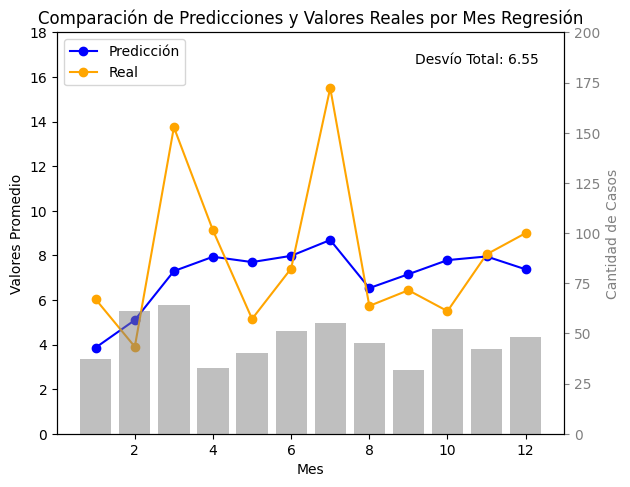

In [464]:
# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'
# y que 'Month of absence' es una columna que representa los meses en formato numérico

# Convertir la columna 'Month of absence' a formato de fecha
X_test2['Month of absence'] = pd.to_datetime(X_test2['Month of absence'], format='%m')

# Agregar una columna 'Mes' basada en la columna de fecha
X_test2['Mes'] = X_test2['Month of absence'].dt.month

# Crear un gráfico de líneas para la predicción y los valores reales
fig, ax1 = plt.subplots()

# Gráfico de líneas para la predicción y los valores reales en el primer eje y
ax1.plot(X_test2.groupby('Mes')['Prediccion'].mean(), label='Predicción', marker='o', color='blue')
ax1.plot(X_test2.groupby('Mes')['Real'].mean(), label='Real', marker='o', color='orange')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Valores Promedio', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
ax1.set_ylim(0, 18)  # Establecer límites en el eje y1

# Segundo eje y para la cantidad de casos
ax2 = ax1.twinx()
ax2.bar(X_test2.groupby('Mes')['Mes'].count().index, X_test2.groupby('Mes')['Mes'].count(), label='Casos', alpha=0.5, color='gray')
ax2.set_ylabel('Cantidad de Casos', color='gray')
ax2.tick_params('y', colors='gray')
ax2.set_ylim(0, 200)  # Establecer límites en el eje y2

# Calcular el desvío total y mostrarlo en el gráfico
desvio_total = np.abs(X_test2['Prediccion'] - X_test2['Real']).mean()
plt.text(0.95, 0.95, f'Desvío Total: {desvio_total:.2f}', ha='right', va='top', transform=plt.gca().transAxes)

# Ajustar el diseño para evitar solapamientos
fig.tight_layout()

# Título del gráfico
plt.title('Comparación de Predicciones y Valores Reales por Mes Regresión')

# Mostrar el gráfico
plt.show()


# LGBM

In [465]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test,Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Creación del modelo LightGBM
model = lgb.LGBMRegressor()

# Entrenamiento del modelo
model.fit(X_train, Y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calcula el coeficiente de determinación (R²)
r2 = r2_score(Y_test, y_pred)
print("R-squared:", r2)

# Genera el informe de evaluación
print("\nEvaluation Report:")
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 2240, number of used features: 17
[LightGBM] [Info] Start training from score 7.096875
Mean Absolute Error: 2.9702674865040057
R-squared: 0.781572775097886

Evaluation Report:
Mean Squared Error: 57.343275175682194
Mean Absolute Error: 2.9702674865040057
R-squared: 0.781572775097886


In [466]:
#VAR y BIOS - LGBM

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import resample
import lightgbm as lgb
import numpy as np

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Creación del modelo LightGBM
model = lgb.LGBMRegressor()

# Entrenamiento del modelo
model.fit(X_train, Y_train)

# Definir el número de muestras Bootstrap
n_muestras = 100

# Inicializar listas para almacenar los errores de predicción
errores_mse = []
errores_mae = []

# Generar muestras Bootstrap y evaluar el modelo en cada una
for _ in range(n_muestras):
    # Generar una muestra Bootstrap
    X_boot, Y_boot = resample(X_test, Y_test, random_state=42)

    # Realizar predicciones en la muestra Bootstrap
    y_pred = model.predict(X_boot)

    # Calcular el error cuadrático medio (MSE) y el error absoluto medio (MAE)
    mse = mean_squared_error(Y_boot, y_pred)
    mae = mean_absolute_error(Y_boot, y_pred)

    # Almacenar los errores de predicción
    errores_mse.append(mse)
    errores_mae.append(mae)

# Calcular el sesgo y la varianza
sesgo = np.mean(errores_mse)
varianza = np.var(errores_mae)

print("Sesgo:", sesgo)
print("Varianza:", varianza)

DF_Resultados.loc[len(DF_Resultados)] = ["LGBM", mse, mae, r2, sesgo, varianza]


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 2240, number of used features: 17
[LightGBM] [Info] Start training from score 7.096875
Sesgo: 49.70310347154261
Varianza: 1.9721522630525295e-31


# Regresión con SVM

In [467]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo SVM de regresión
model = SVR()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo (por ejemplo, MSE en el conjunto de prueba)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 287.07636206679507
Mean Absolute Error: 2.777844842930893
R-squared: 0.781572775097886


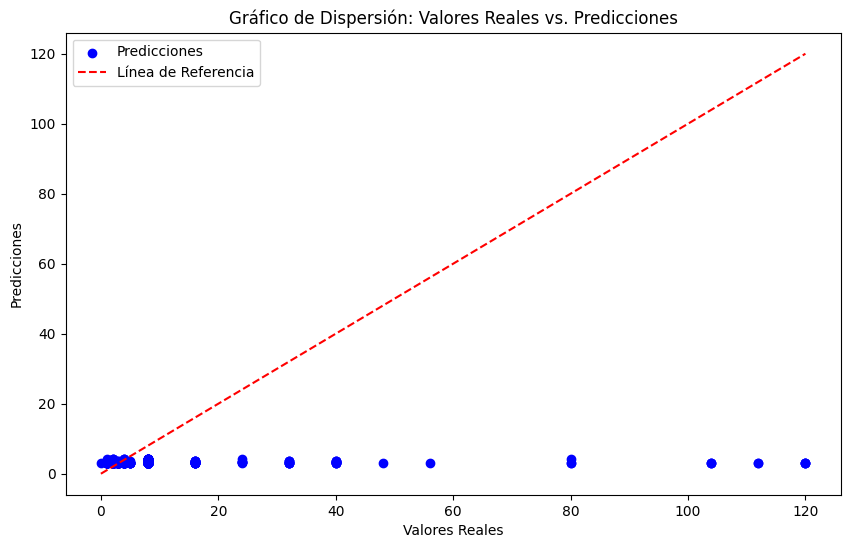

In [468]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='blue', label='Predicciones')

# Línea diagonal de referencia
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Línea de Referencia')

# Etiquetas y título
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión: Valores Reales vs. Predicciones')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [469]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import resample
from sklearn.svm import SVR
import numpy as np

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo SVM de regresión
model = SVR()
model.fit(X_train, y_train)

# Definir el número de muestras Bootstrap
n_muestras = 100

# Inicializar listas para almacenar los errores de predicción
errores_mse = []
errores_mae = []

# Generar muestras Bootstrap y evaluar el modelo en cada una
for _ in range(n_muestras):
    # Generar una muestra Bootstrap
    X_boot, y_boot = resample(X_test, y_test, random_state=42)

    # Realizar predicciones en la muestra Bootstrap
    y_pred = model.predict(X_boot)

    # Calcular el error cuadrático medio (MSE) y el error absoluto medio (MAE)
    mse = mean_squared_error(y_boot, y_pred)
    mae = mean_absolute_error(y_boot, y_pred)

    # Almacenar los errores de predicción
    errores_mse.append(mse)
    errores_mae.append(mae)

# Calcular el sesgo y la varianza
sesgo = np.mean(errores_mse)
varianza = np.var(errores_mae)

print("Sesgo:", sesgo)
print("Varianza:", varianza)


DF_Resultados.loc[len(DF_Resultados)] = ["SVM", mse, mae, r2, sesgo, varianza]

Sesgo: 284.31944463396866
Varianza: 7.099748146989106e-30


# Xgboost

In [470]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Creación del modelo XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)

# Entrenamiento del modelo
model.fit(X_train, Y_train)

# Predicciones en el conjunto de prueba
Y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Imprimir resultados
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 210.52864186440326
Mean Absolute Error: 5.911598913158689


In [471]:
from sklearn.utils import resample

# Definir el número de muestras Bootstrap
n_muestras = 100

# Inicializar listas para almacenar los errores de predicción
errores_mse = []

# Generar muestras Bootstrap y evaluar el modelo en cada una
for _ in range(n_muestras):
    # Generar una muestra Bootstrap
    X_boot, Y_boot = resample(X_test, Y_test, random_state=42)

    # Realizar predicciones en la muestra Bootstrap
    Y_pred = model.predict(X_boot)

    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(Y_boot, Y_pred)

    # Almacenar el MSE en la lista de errores
    errores_mse.append(mse)

# Calcular el sesgo y la varianza
sesgo = np.mean(errores_mse)
varianza = np.var(errores_mse)

print("Sesgo:", sesgo)
print("Varianza:", varianza)

DF_Resultados.loc[len(DF_Resultados)] = ["Xgboost", mse, mae, r2, sesgo, varianza]

Sesgo: 207.15522495275246
Varianza: 0.0


# Kmeans - Silhouette

Para n_clusters = 2 El promedio del score de silhouette es:  0.2163612180500356
Para n_clusters = 3 El promedio del score de silhouette es:  0.21837739689084462
Para n_clusters = 4 El promedio del score de silhouette es:  0.2472791270377441
Para n_clusters = 5 El promedio del score de silhouette es:  0.27501719123309126
Para n_clusters = 6 El promedio del score de silhouette es:  0.2758138309161531
Para n_clusters = 7 El promedio del score de silhouette es:  0.2913741309575609
Para n_clusters = 8 El promedio del score de silhouette es:  0.2781407132273929
Para n_clusters = 9 El promedio del score de silhouette es:  0.30400109651010393


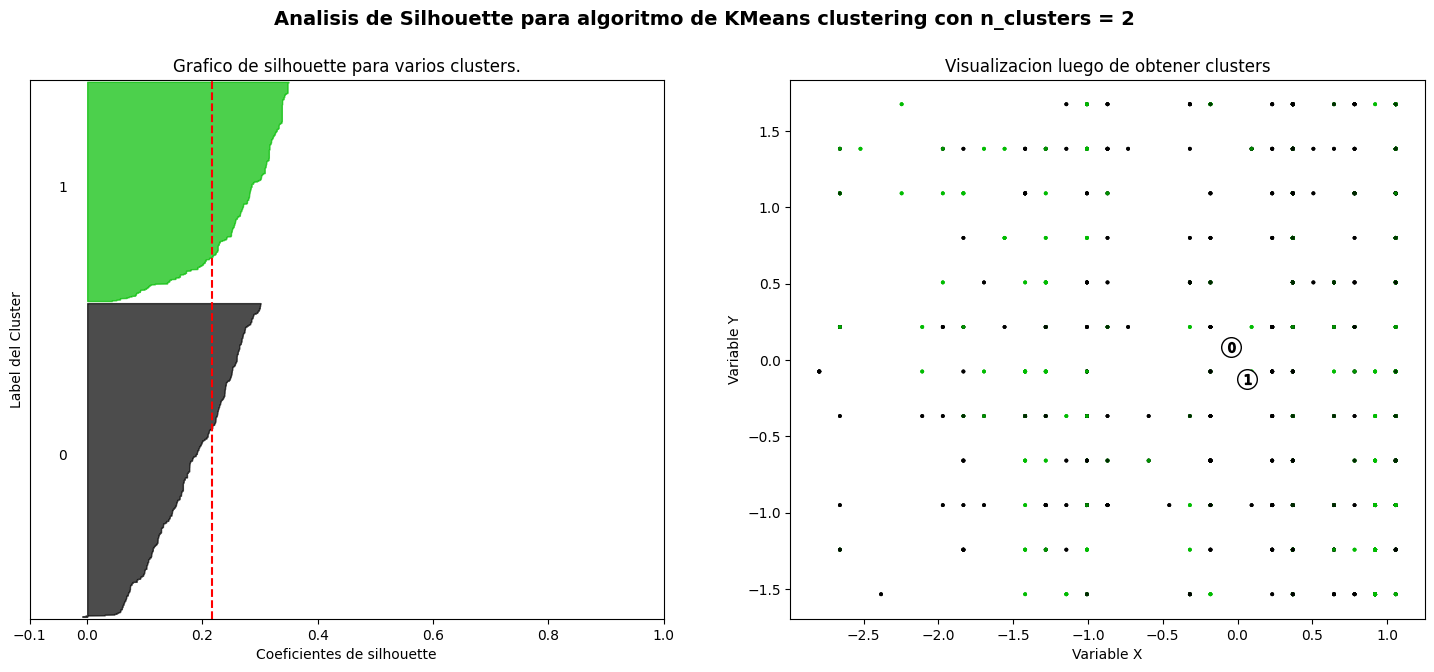

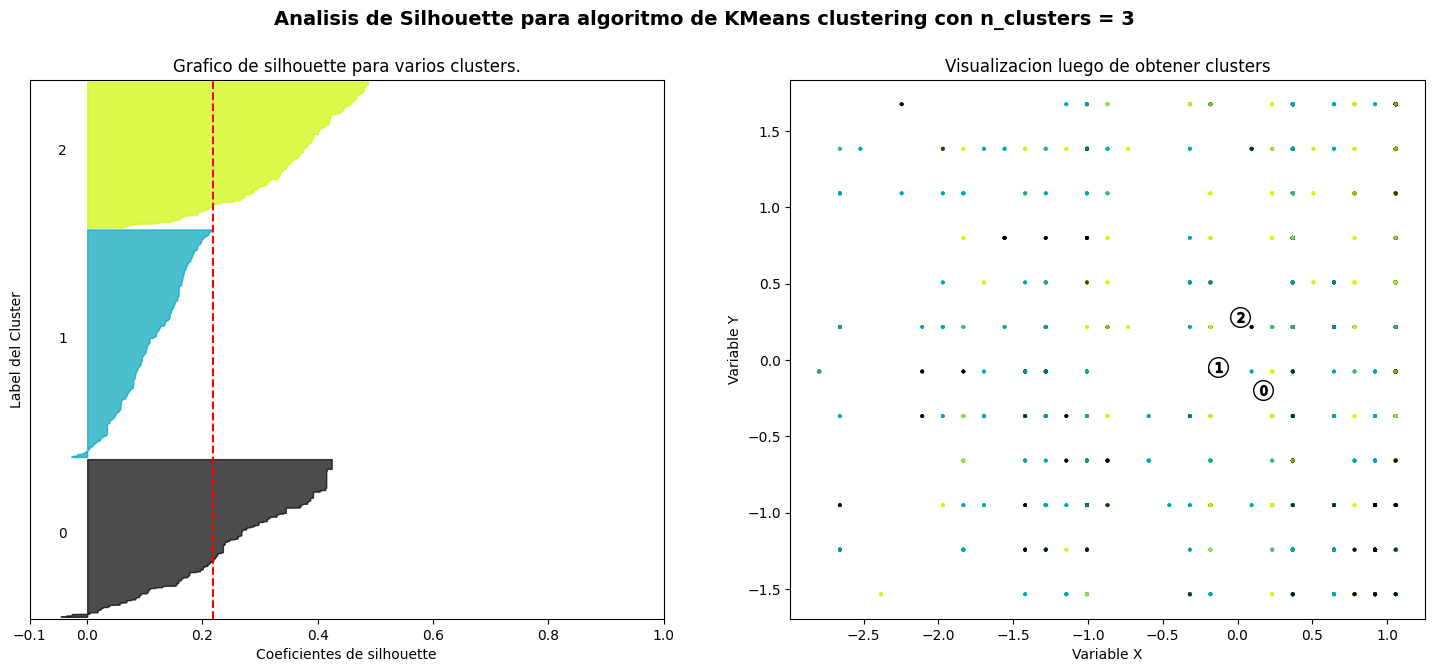

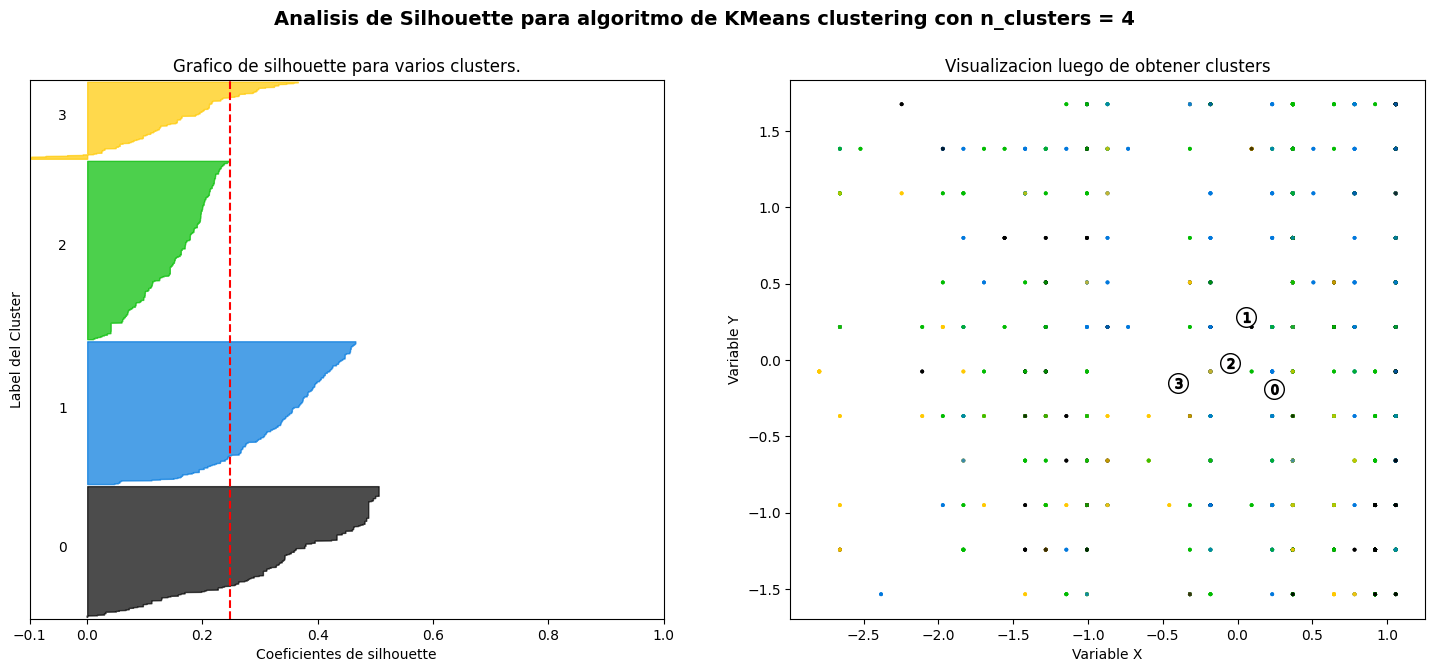

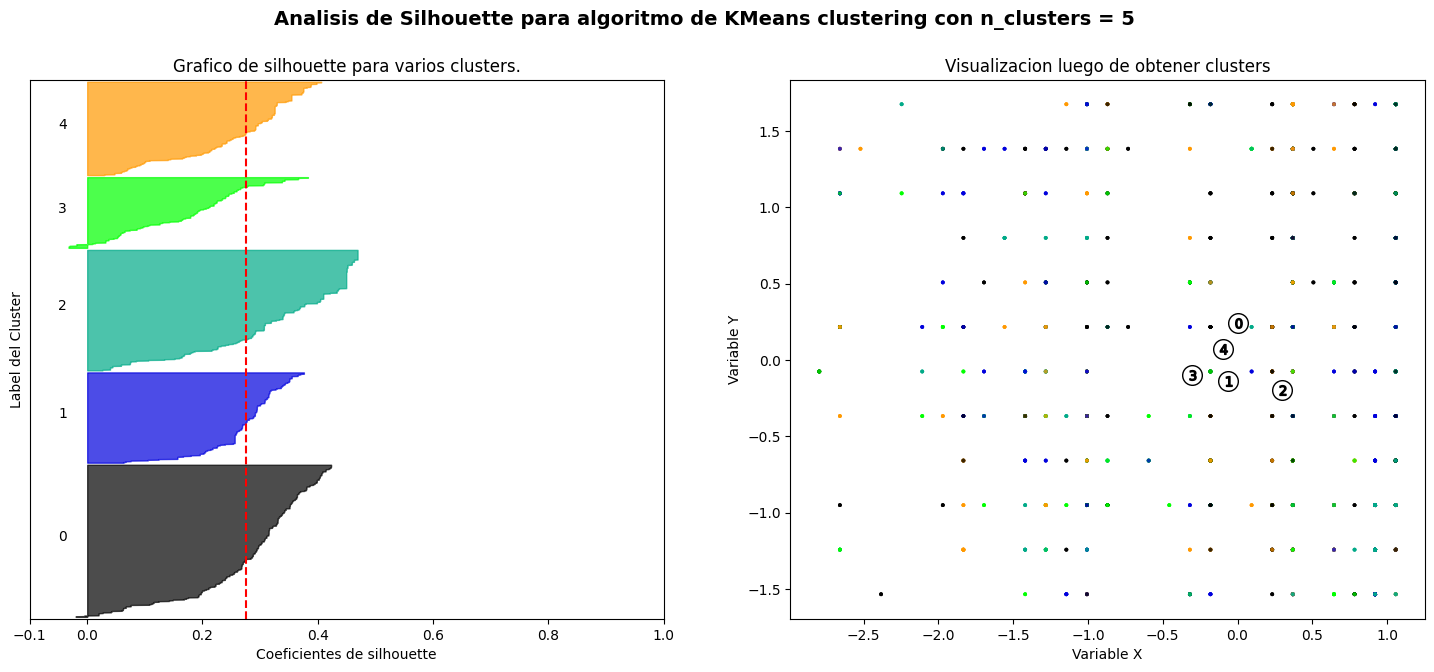

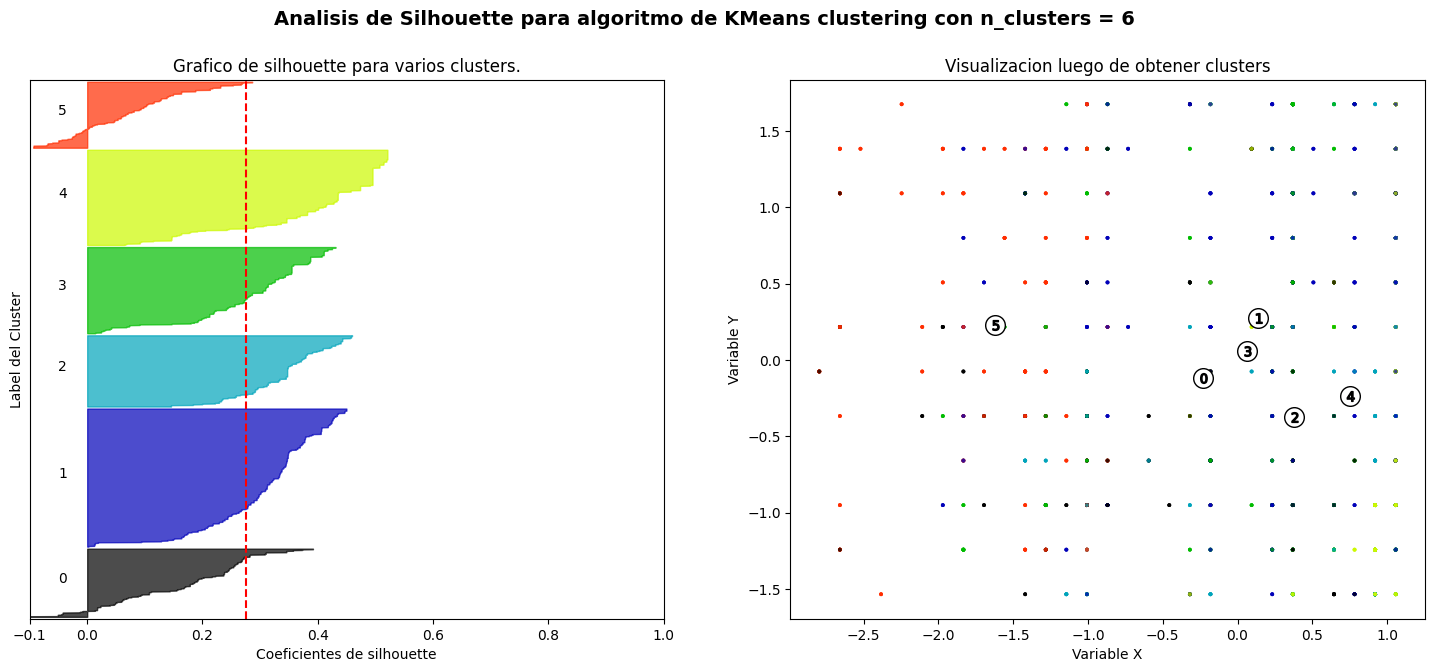

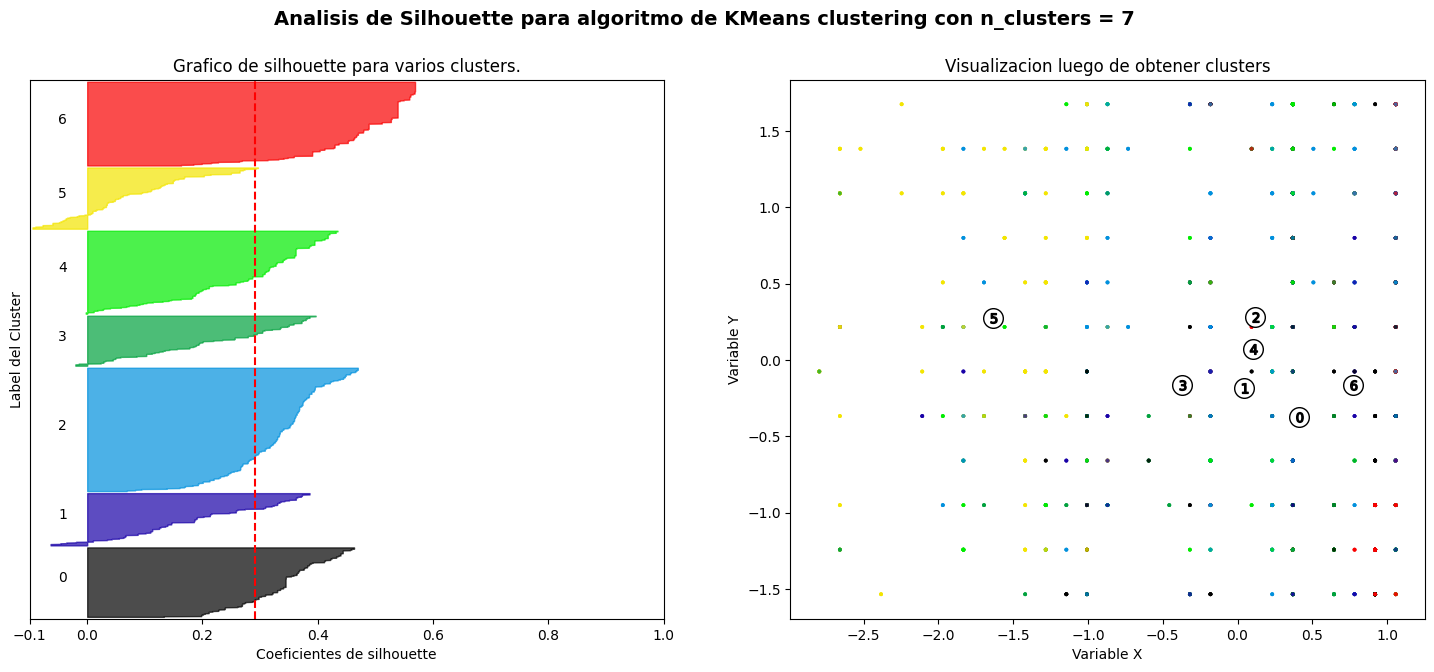

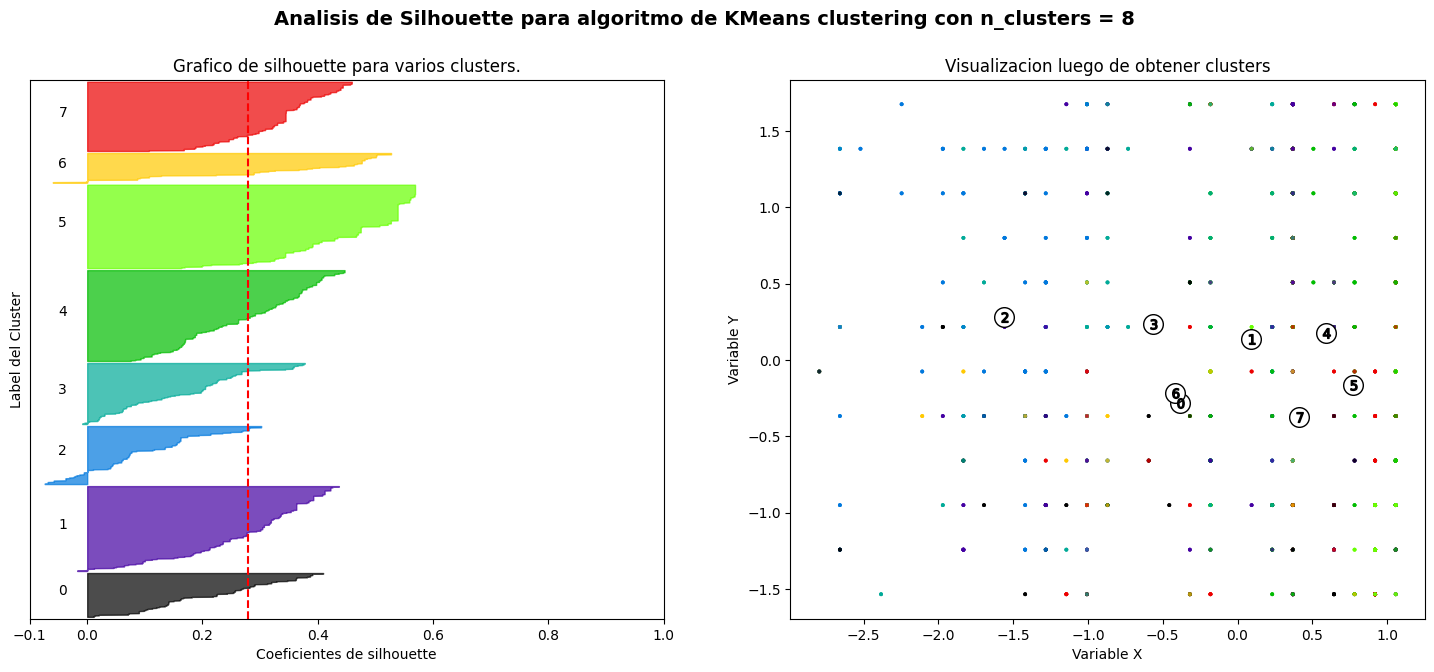

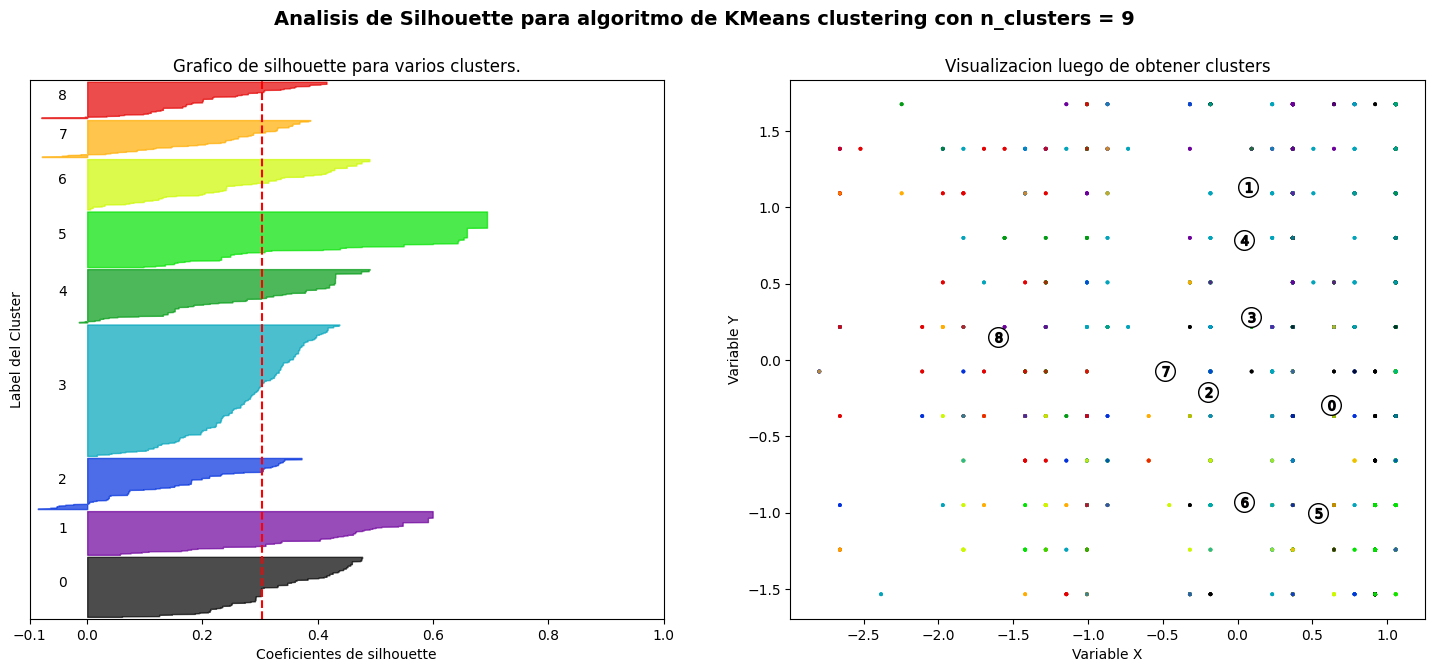

In [472]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2, 10):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # El 1 subplot es para el score de silhouette
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
    # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # El score de silhouette_score da el promedio de todos los valores
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    # 2 grafica mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


# Split con Cross Validation

In [473]:
column_names = df_nuevo_1.columns
print(column_names)

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Education', 'Son',
       'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height',
       'Body mass index', 'Absenteeism time in hours'],
      dtype='object')


In [474]:
from sklearn.ensemble import AdaBoostRegressor #Boosting
from sklearn.ensemble import RandomForestClassifier #Bagging
from sklearn.model_selection import KFold, cross_val_score

#df_nuevo_1

y_target=df_nuevo_1['Absenteeism time in hours']

# Instanciar el metodo con los kfold desados
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Instanciar el modelo a entrenar
model_ada = AdaBoostRegressor()
model_rf = RandomForestClassifier()

# Entrenar y evaluar el modelo AdaBoostRegressor
scores_ada = cross_val_score(model_ada, df_nuevo_1, y_target, cv=kfold)
print("Accuracy AdaBoostRegressor: %0.2f (+/- %0.2f)" % (scores_ada.mean(), scores_ada.std() * 2))

# Entrenar y evaluar el modelo RandomForestClassifier
scores_rf = cross_val_score(model_rf, df_nuevo_1, y_target, cv=kfold)
print("Accuracy RandomForestClassifier: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std() * 2))

Accuracy AdaBoostRegressor: 0.99 (+/- 0.02)
Accuracy RandomForestClassifier: 1.00 (+/- 0.01)


# Random Forest Classifier - SI

In [475]:
from sklearn.ensemble import RandomForestClassifier

# Instanciar el modelo RandomForestClassifier
model_rf = RandomForestClassifier()

# Entrenar el modelo con todo el DataFrame
model_rf.fit(df_nuevo_1, y_target)

# Obtener la importancia de las características
feature_importances = model_rf.feature_importances_

# Crear una lista de tuplas (nombre de la columna, importancia)
column_importance = list(zip(df_nuevo_1.columns, feature_importances))

# Ordenar la lista por importancia descendente
column_importance.sort(key=lambda x: round(x[1], 2), reverse=True)

# Imprimir las columnas y su importancia
for column, importance in column_importance:
    print(f"{column}: {importance:.2f}")

# Seleccionar las columnas que no son relevantes (por ejemplo, aquellas con importancia menor a un umbral)
umbral_importancia = 0.01
columnas_no_relevantes = [column for column, importance in column_importance if importance < umbral_importancia]

# Crear un nuevo DataFrame excluyendo las columnas no relevantes
df_nuevo_2 = df_nuevo_1.drop(columns=columnas_no_relevantes)

print(columnas_no_relevantes)
cantidad_columnas_no_relevantes = len(columnas_no_relevantes)
print("Cantidad de columnas no relevantes:", cantidad_columnas_no_relevantes)

# Probar el modelo con el nuevo DataFrame df_nuevo_2
#scores_rf_new = cross_val_score(model_rf, df_nuevo_2, y_target, cv=kfold)
#print("Accuracy RandomForestClassifier con columnas relevantes: %0.2f (+/- %0.2f)" % (scores_rf_new.mean(), scores_rf_new.std() * 2))

y_target=df_nuevo_2['Absenteeism time in hours']

# Instanciar el metodo con los kfold desados
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Instanciar el modelo a entrenar
model_ada = AdaBoostRegressor()
model_rf = RandomForestClassifier()

# Entrenar y evaluar el modelo AdaBoostRegressor
scores_ada = cross_val_score(model_ada, df_nuevo_2, y_target, cv=kfold)
print("Accuracy AdaBoostRegressor: %0.2f (+/- %0.2f)" % (scores_ada.mean(), scores_ada.std() * 2))

# Entrenar y evaluar el modelo RandomForestClassifier
scores_rf = cross_val_score(model_rf, df_nuevo_2, y_target, cv=kfold)
print("Accuracy RandomForestClassifier: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std() * 2))

Absenteeism time in hours: 0.56
Reason for absence: 0.09
Work load Average/day : 0.06
Month of absence: 0.05
Day of the week: 0.04
Seasons: 0.03
Transportation expense: 0.03
Distance from Residence to Work: 0.02
Service time: 0.02
Age: 0.02
Weight: 0.02
Height: 0.02
Body mass index: 0.02
Education: 0.00
Son: 0.00
Social drinker: 0.00
Social smoker: 0.00
Pet: 0.00
['Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']
Cantidad de columnas no relevantes: 5
Accuracy AdaBoostRegressor: 0.99 (+/- 0.00)
Accuracy RandomForestClassifier: 1.00 (+/- 0.01)


In [476]:
print(DF_Resultados)

          MODELO         MSE       MAE        R2        BIAS      VARIANZA
0  Random Forest   23.964916  1.377865  0.880955   23.964916  4.437343e-31
1      Regresión  223.955509  6.549514  0.880955  223.955509  7.888609e-31
2           LGBM   49.703103  2.777845  0.781573   49.703103  1.972152e-31
3            SVM  284.319445  6.235323  0.781573  284.319445  7.099748e-30
4        Xgboost  207.155225  5.911599  0.198072  207.155225  0.000000e+00


# Conclusión

En primer lugar se habia realizado el analisis con los resultado con las muestras que teniamos. Las cuales llegamos a la conclusión que no eran suficientes. A fin de poder seguir usando el modelo, generamos 4000 muestras random.
Hemos tratado de ver si podiamos juntar caracteristicas por medio de K-means, pero no es posible.
Por otro lado, para poder predecir la inasistencia se esta usaron distintos tipos de algorimos para poder ver cual era mejor para lo que queriamos predecir.
Vimos que sacar los fixture al final terminaba dando peores resultados, asi que volvimos a empezar, colocando todas las columnas.
Luego de esto encontramos que Random Forest y el Regresion Lineal los resultados son muy parecidos.

Mean Squared Error: 8.174852230543102
Mean Absolute Error: 0.5820271082794833
R-squared: 0.9538899388410113



![image.png](attachment:image.png)

In [477]:
columnas_df_nuevo_1 = df_nuevo_1.columns.tolist()
print(columnas_df_nuevo_1)


['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


In [478]:
#Vamos a desconsiderar las columnas que no tienen correlacion
df_nuevo_3 = df_nuevo_1[['Absenteeism time in hours', 'Reason for absence', 'Month of absence', 'Transportation expense', 'Age', 'Son', 'Social drinker']]

df_nuevo_3.shape


(2800, 7)

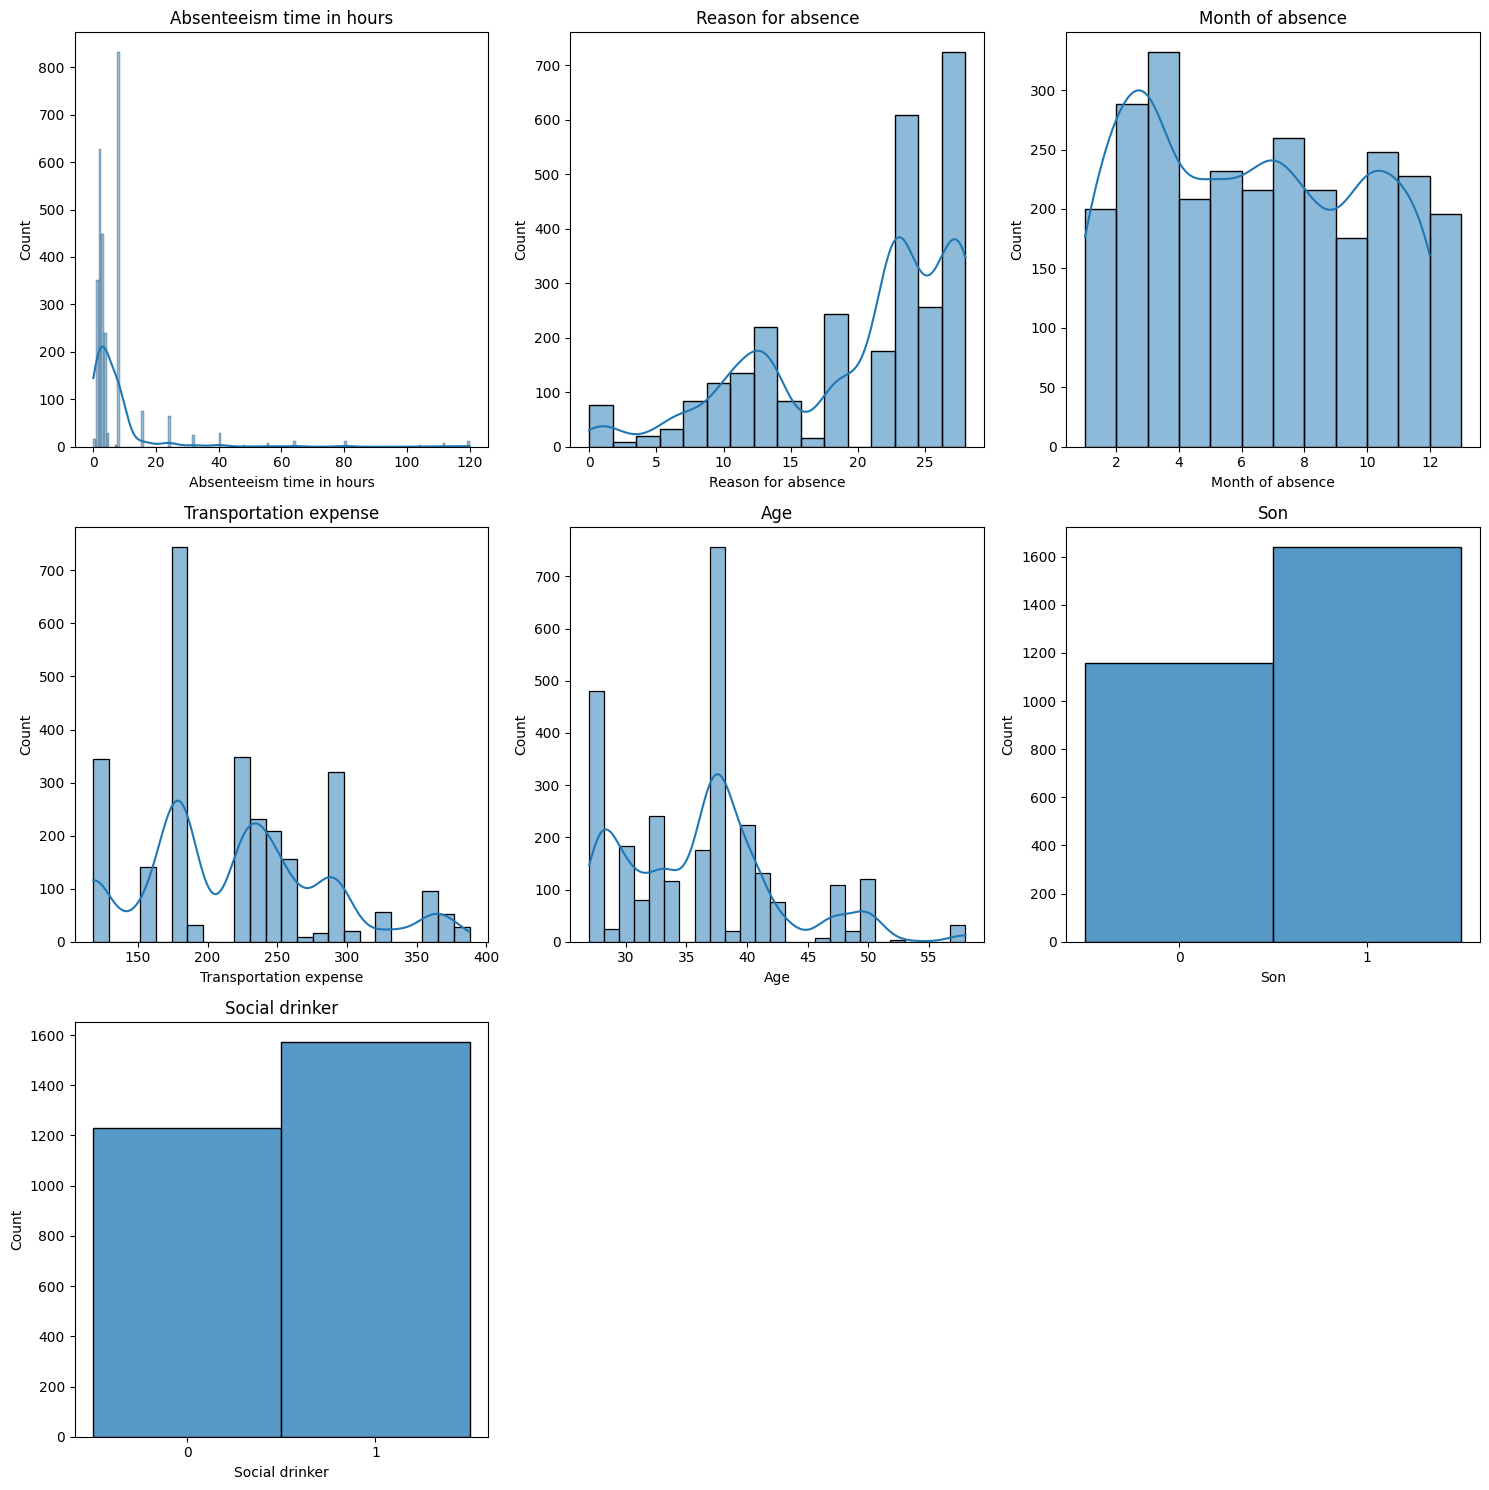

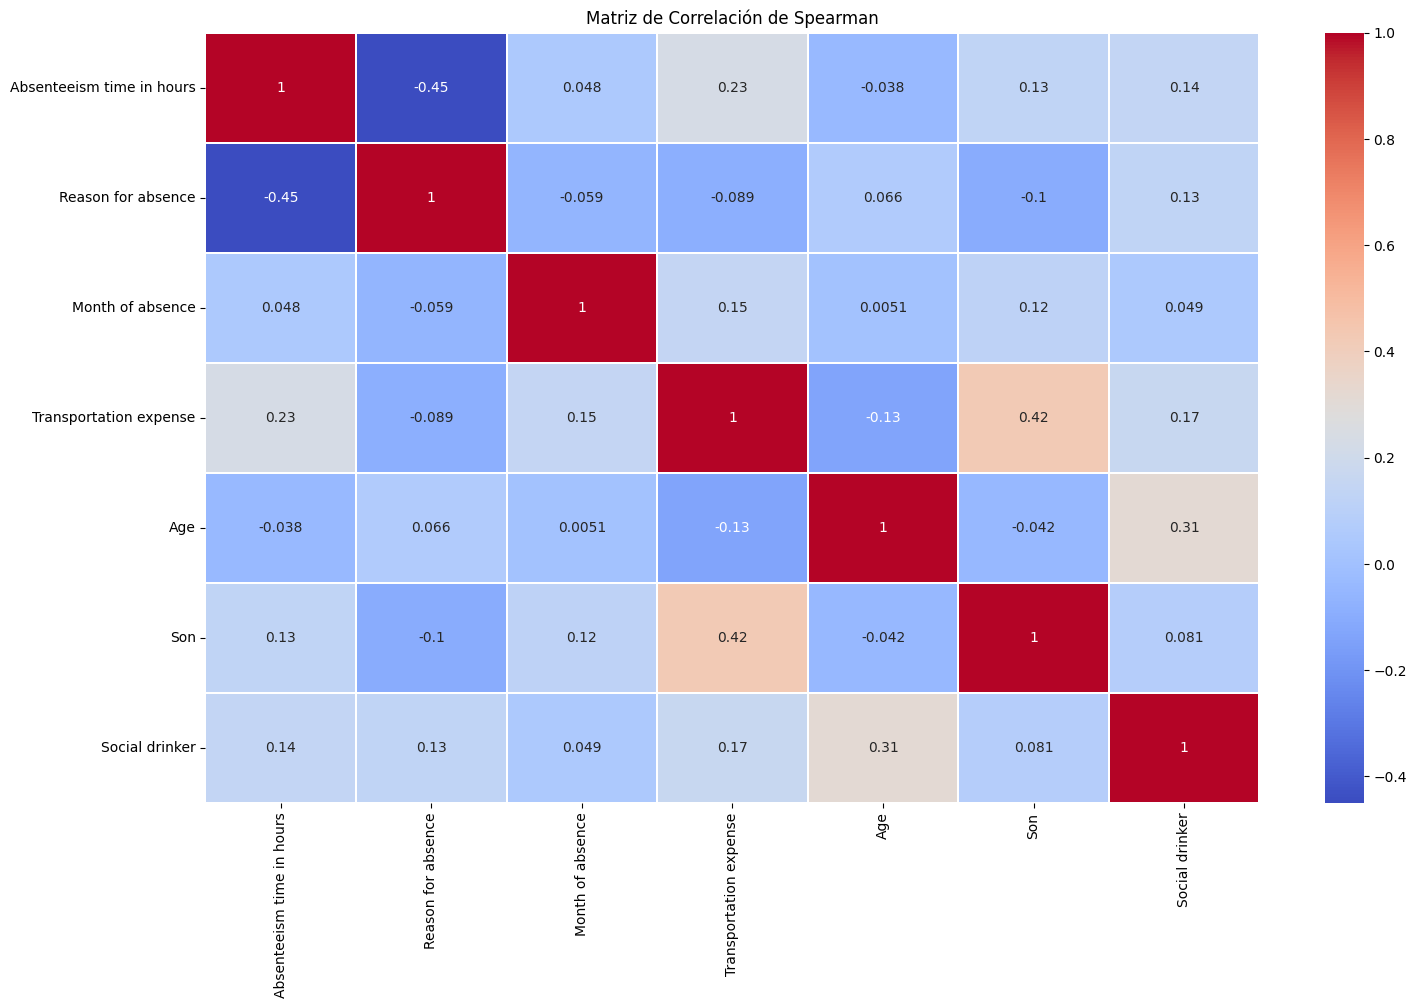

In [479]:
# Definir el número de columnas para mostrar en cada fila
num_columnas_por_fila = 3

# Calcular el número total de subgráficos y filas
num_subgraficos = len(df_nuevo_3.columns)
num_filas = (num_subgraficos - 1) // num_columnas_por_fila + 1

# Configurar el tamaño del lienzo
plt.figure(figsize=(15, 5 * num_filas))

# Iterar sobre cada columna y crear un histograma
for i, columna in enumerate(df_nuevo_3.columns):
    plt.subplot(num_filas, num_columnas_por_fila, i + 1)

    # Verificar si la columna es 'Son', 'Social drinker', o 'Social smoker'
    if columna in ['Son', 'Social drinker', 'Social smoker']:
        sns.histplot(df_nuevo_3[columna], bins=[-0.5, 0.5, 1.5], kde=False, discrete=True)  # Escala de 0 y 1
        plt.xticks([0, 1], ['0', '1'])  # Establecer los ticks del eje x como números enteros
    elif columna == 'Month of absence':
        sns.histplot(df_nuevo_3[columna], bins=range(1, 14), kde=True)  # Escala de 1 a 13 para meses
    else:
        sns.histplot(df_nuevo_3[columna], kde=True)
    plt.title(columna)

# Ajustar el diseño para evitar la superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Calcular la matriz de correlación de Spearman
correlation_matrix = df_nuevo_3.corr(method="spearman")

# Agregar 'Absenteeism time in hours' a la matriz de correlación
correlation_matrix['Absenteeism time in hours'] = df_nuevo_3.corrwith(df_nuevo_3['Absenteeism time in hours'], method="spearman")

# Crear un mapa de calor
plt.figure(figsize=(17, 10))  # Ajustar el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.25)
plt.title('Matriz de Correlación de Spearman')
plt.show()


In [499]:
# Crear las variables X_data e y_data
Y_data_3 = df_nuevo_3['Absenteeism time in hours']
X_data_3 = df_nuevo_3.drop('Absenteeism time in hours', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_data_3, Y_data_3, test_size=0.3)


Para n_clusters = 2 El promedio del score de silhouette es:  0.2163612180500356
Para n_clusters = 3 El promedio del score de silhouette es:  0.21837739689084462
Para n_clusters = 4 El promedio del score de silhouette es:  0.2472791270377441
Para n_clusters = 5 El promedio del score de silhouette es:  0.27501719123309126
Para n_clusters = 6 El promedio del score de silhouette es:  0.2758138309161531
Para n_clusters = 7 El promedio del score de silhouette es:  0.2913741309575609
Para n_clusters = 8 El promedio del score de silhouette es:  0.2781407132273929
Para n_clusters = 9 El promedio del score de silhouette es:  0.30400109651010393


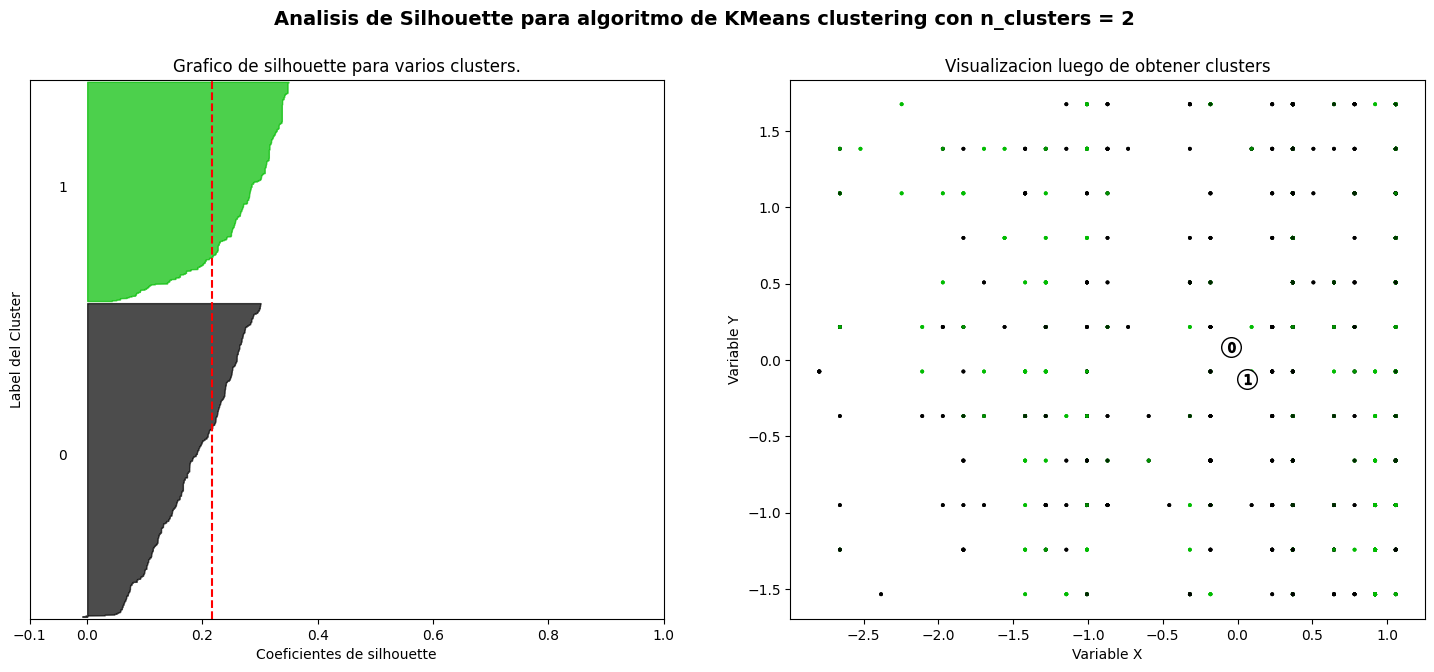

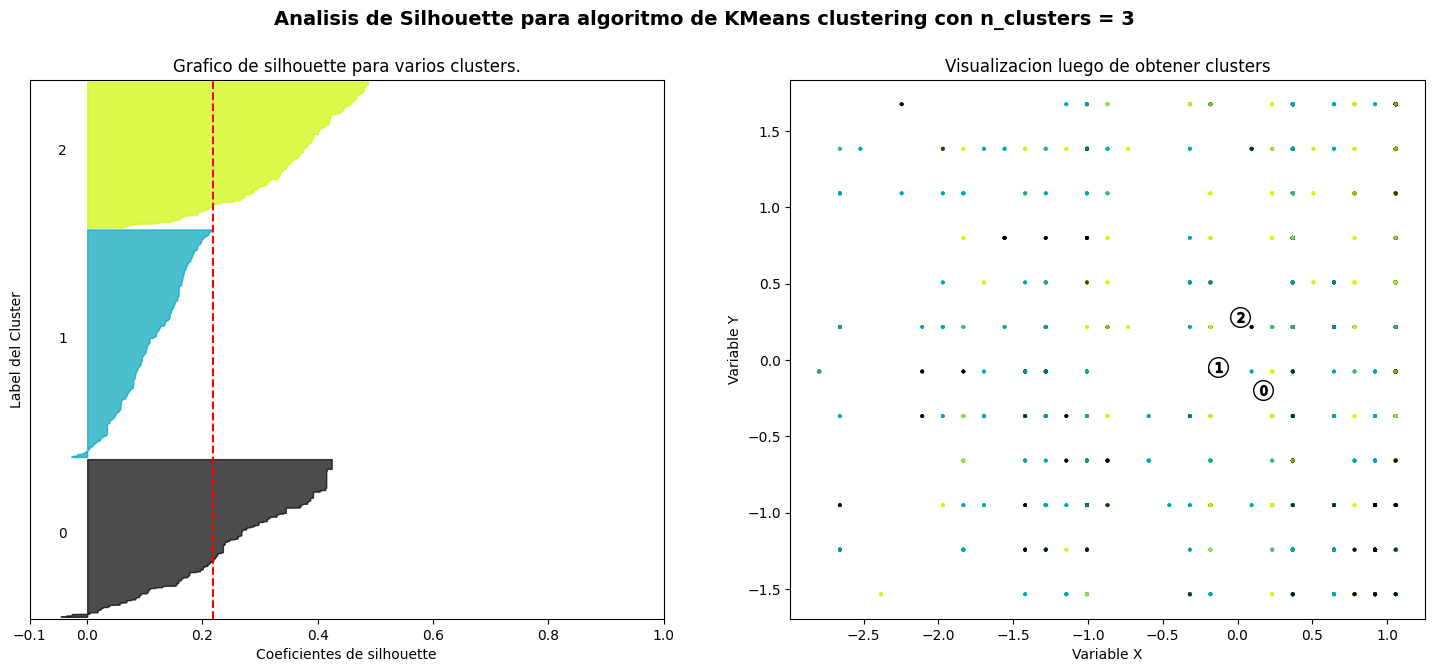

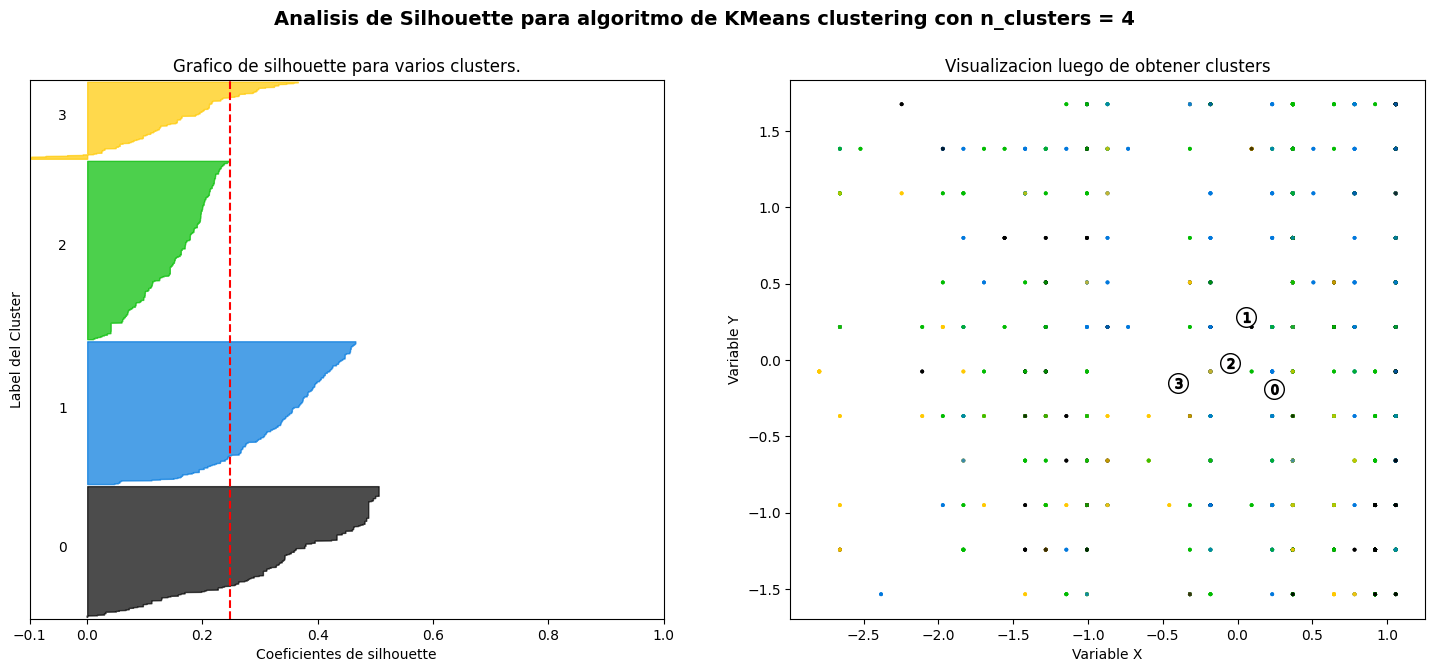

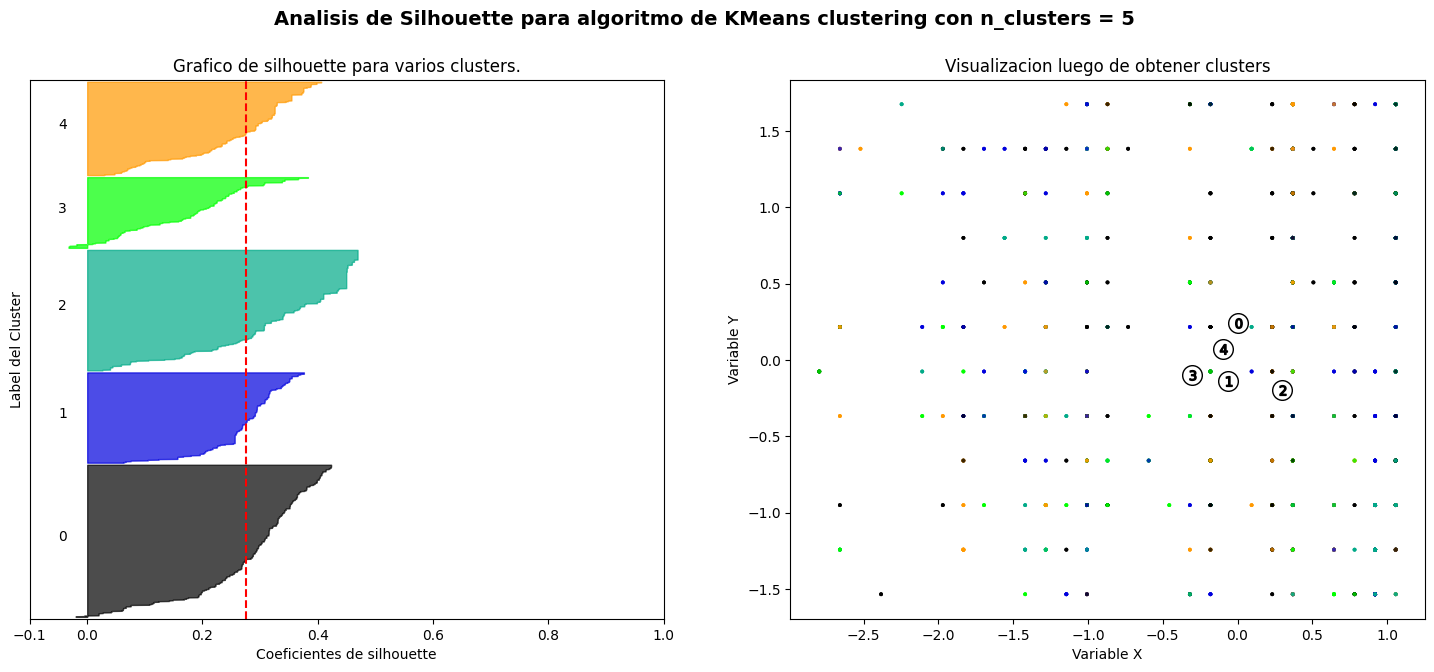

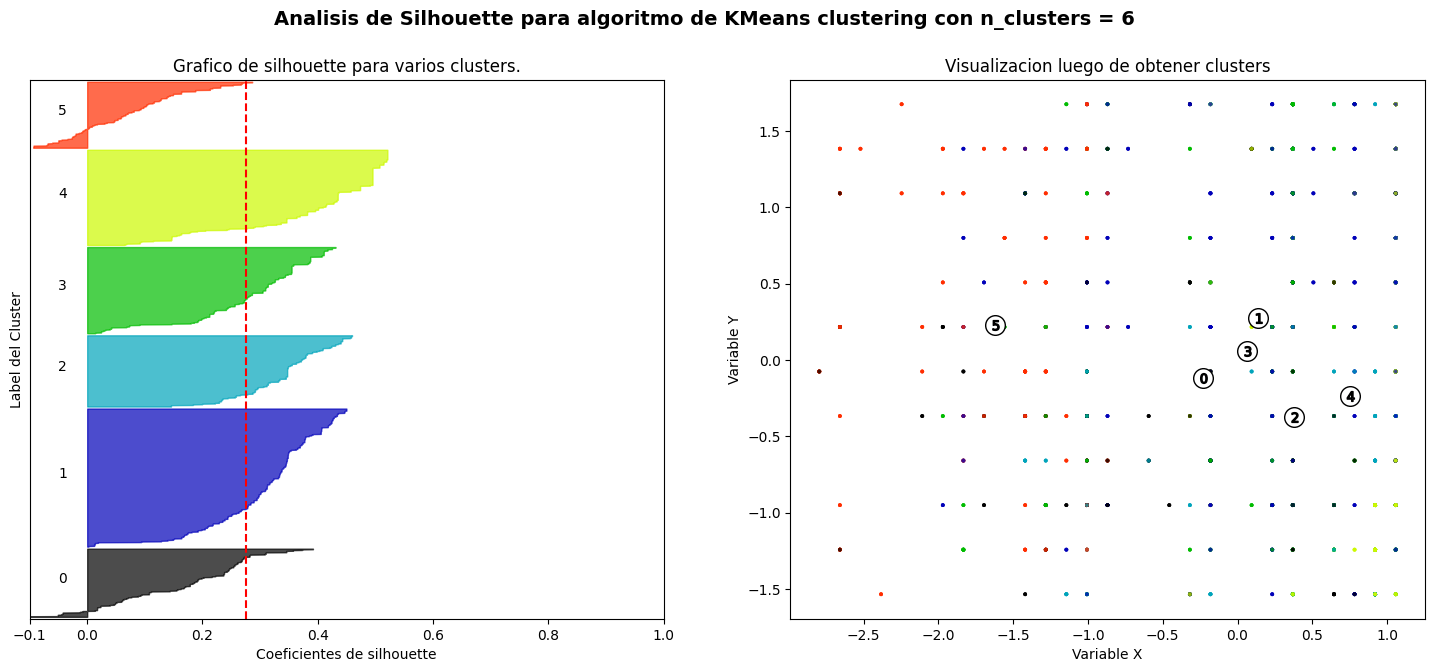

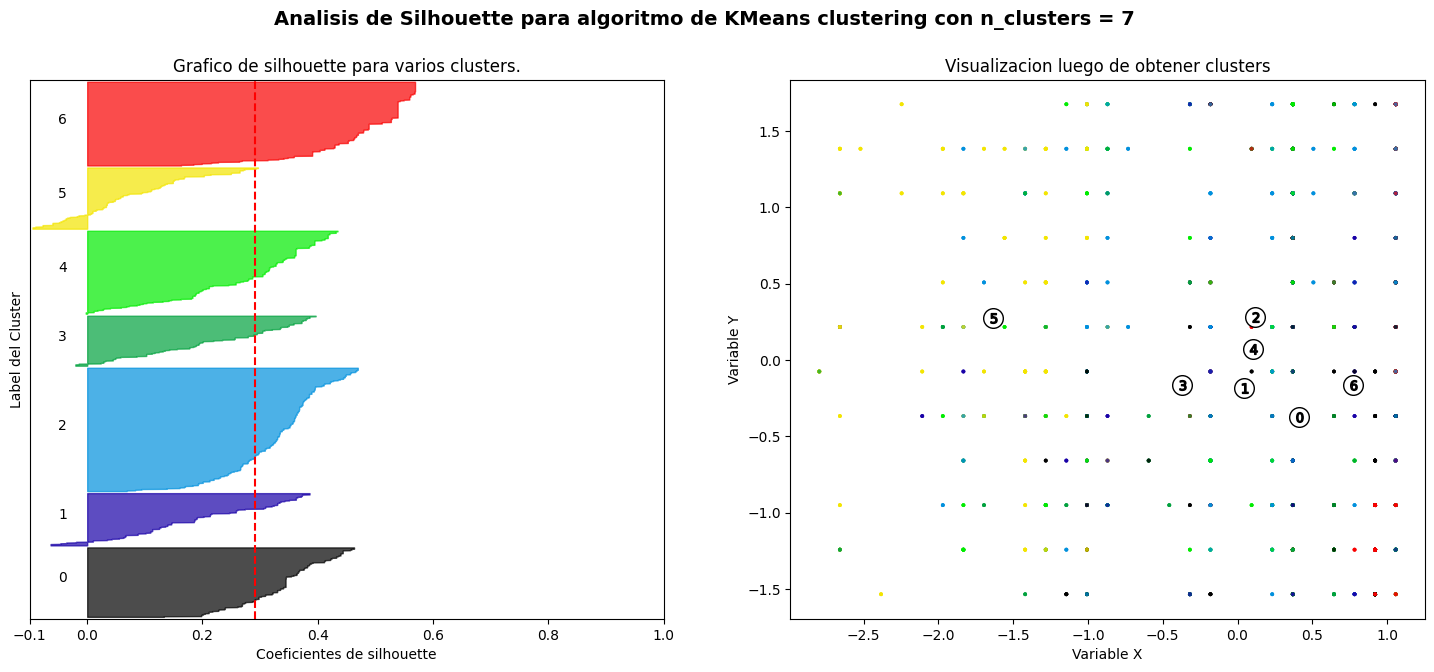

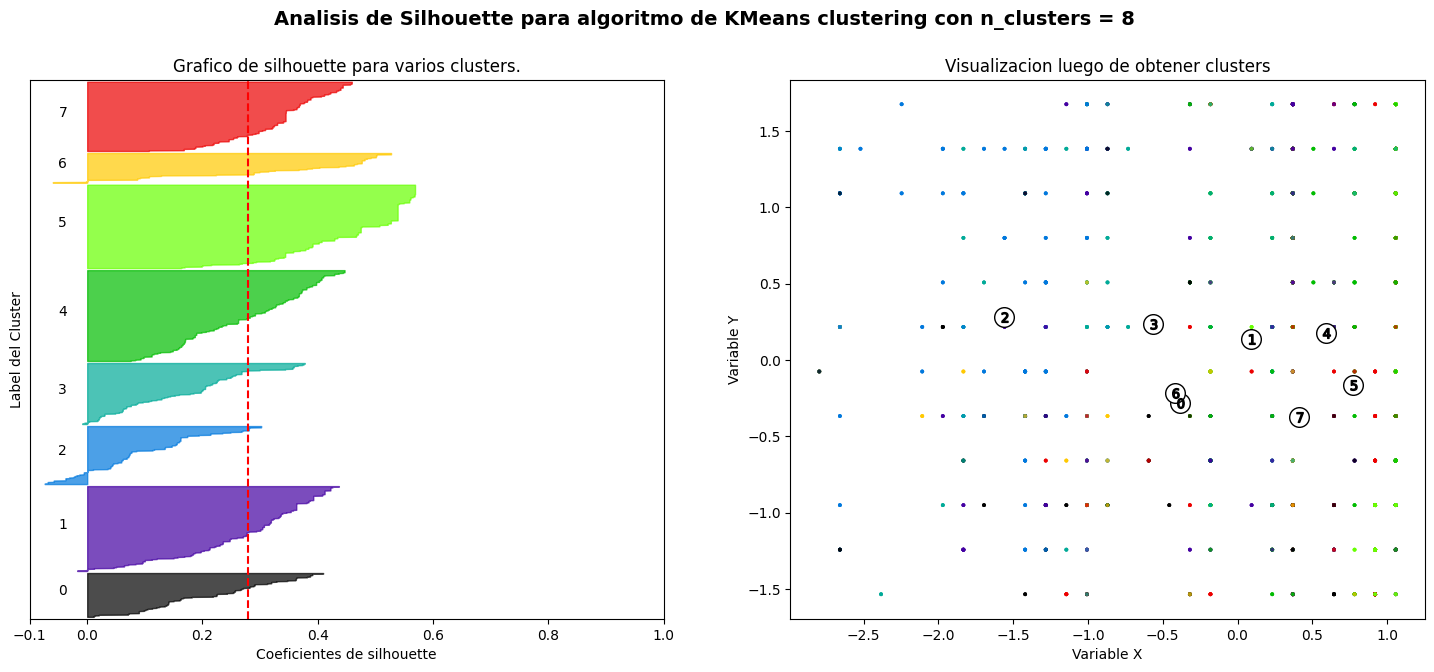

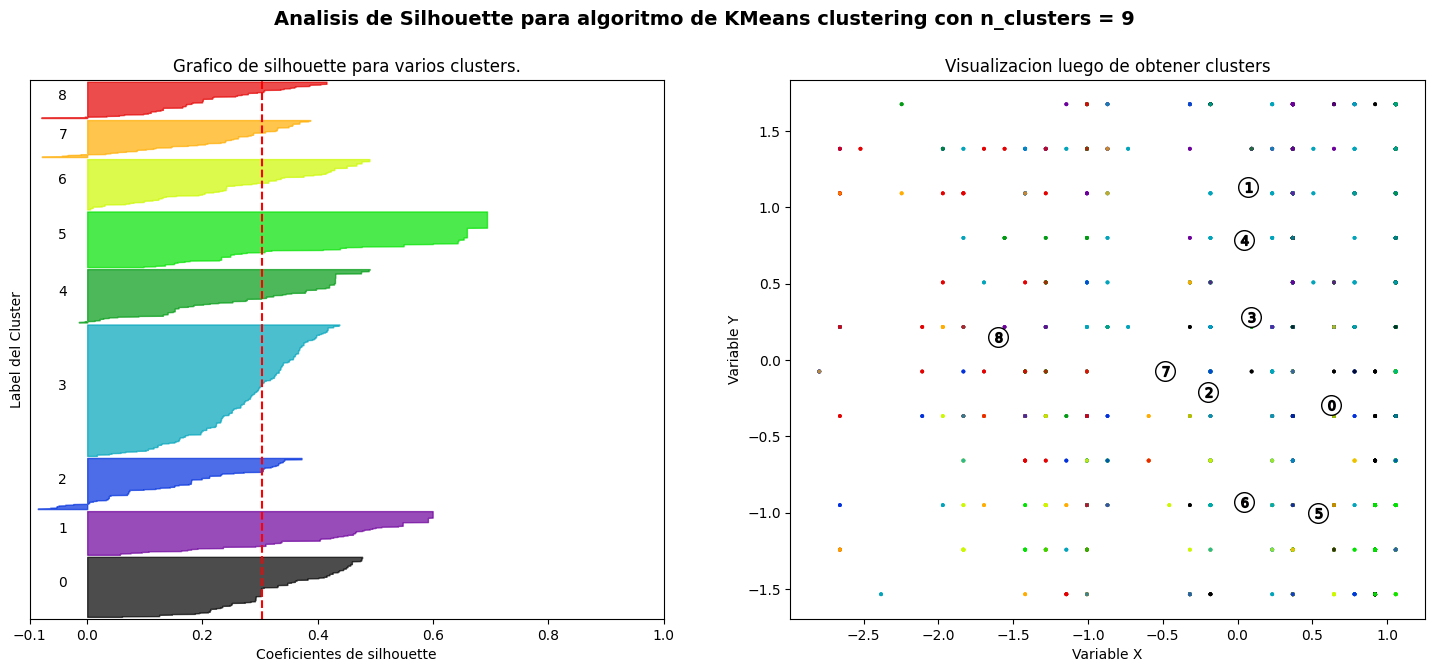

In [482]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm

# Crear las variables X_data_3 e Y_data_3
X_data_3 = df_nuevo_3.drop('Absenteeism time in hours', axis=1)
Y_data_3 = df_nuevo_3['Absenteeism time in hours']

# Normalizar los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_data_3)

# Usar X_normalized en lugar de X
X = X_normalized

for n_clusters in range(2, 10):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # El 1 subplot es para el score de silhouette
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
    # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters, max_iter=500, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # El score de silhouette_score da el promedio de todos los valores
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    # 2 grafica mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



# Random Forest GridSearch

In [501]:
#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [502]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [20,30,50,100],
    'max_features': [2,4,5],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'max_depth':[3,4,5,6]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  #
                                  cv = 5,
                                  verbose = 1, # Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

grid_random_forest.fit(X_train, Y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


KeyboardInterrupt: 

In [486]:
#random_forest_nuevo = RandomForestRegressor(criterion='absolute_error', max_depth=6, max_features=5,n_estimators=50)

# Asignar el mejor estimador encontrado por la búsqueda de hiperparámetros a random_forest_nuevo
random_forest_nuevo = grid_random_forest.best_estimator_

X_test1= X_test.copy()
X_test1['Prediccion']=np.round(random_forest_nuevo.predict(X_test),0)
X_test1

,Reason for absence,Month of absence,Transportation expense,Age,Son,Social drinker,Prediccion
2032,23,11,225,28,1,0,2.0
1711,13,6,118,50,1,1,7.0
2839,23,3,248,47,1,0,2.0
2206,19,7,233,31,1,1,8.0
733,22,7,225,28,1,0,10.0
...,...,...,...,...,...,...,...
211,12,5,179,38,0,1,8.0
1639,22,3,291,40,1,1,8.0
1997,23,10,369,31,1,1,7.0
2166,5,5,118,50,1,1,6.0


In [487]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Supongamos que tienes X_data e y_data definidos
# Aquí estamos utilizando RandomForestRegressor como ejemplo de modelo
X_train, X_test, Y_train, Y_test = train_test_split(X_data_3, Y_data_3, test_size=0.3, random_state=42)

# Entrenar el modelo
random_forest_nuevo = RandomForestRegressor()
random_forest_nuevo.fit(X_train, Y_train)

# Crear un DataFrame con el conjunto de prueba y las predicciones redondeadas
X_test1 = X_test.copy()
X_test1['Prediccion'] = np.round(random_forest_nuevo.predict(X_test), 0)

# Agregar la columna 'Real' con los valores reales
X_test1['Real'] = Y_test.values

# Imprimir el DataFrame actualizado
X_test1

,Reason for absence,Month of absence,Transportation expense,Age,Son,Social drinker,Prediccion,Real
1159,23,4,118,50,1,1,1.0,1
819,28,10,260,36,1,1,3.0,3
2288,23,10,118,37,0,0,3.0,3
1264,13,10,225,28,1,0,2.0,1
2032,23,11,225,28,1,0,2.0,2
...,...,...,...,...,...,...,...,...
720,25,6,118,37,0,0,3.0,3
963,23,6,291,40,1,1,4.0,4
2804,27,1,179,38,0,1,3.0,2
2731,28,10,291,40,1,1,3.0,2


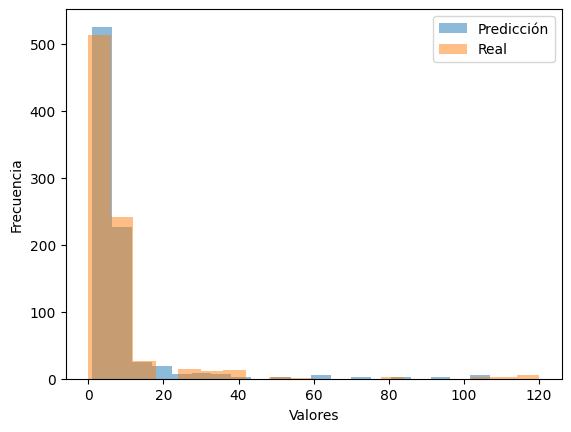

Desvío medio entre Predicción y Real: 2.2964285714285713


In [488]:
# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'

# Crear un histograma que muestre tanto las predicciones como los valores reales
plt.hist(X_test1['Prediccion'], bins=20, alpha=0.5, label='Predicción')
plt.hist(X_test1['Real'], bins=20, alpha=0.5, label='Real')

# Añadir etiquetas y leyenda
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

# Calcular el desvío entre predicciones y valores reales
desvio = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
print(f"Desvío medio entre Predicción y Real: {desvio}")

Mean Squared Error: 46.83749391735853
Mean Absolute Error: 2.3670857855542042
R-squared: 0.8015610570866634


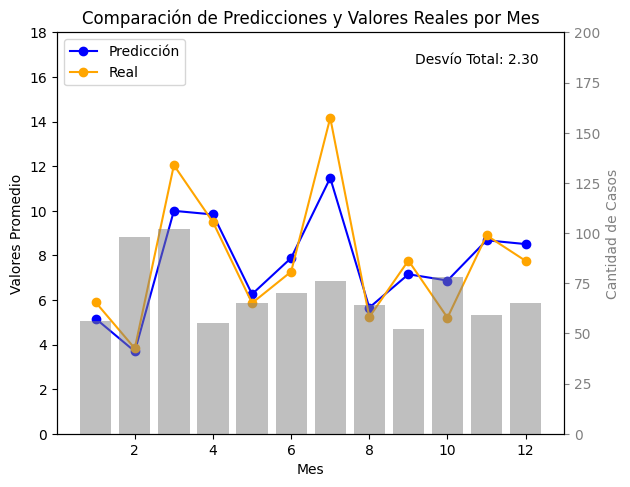

In [489]:
# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'
# y que 'Month of absence' es una columna que representa los meses en formato numérico

# Convertir la columna 'Month of absence' a formato de fecha
X_test1['Month of absence'] = pd.to_datetime(X_test1['Month of absence'], format='%m')

# Agregar una columna 'Mes' basada en la columna de fecha
X_test1['Mes'] = X_test1['Month of absence'].dt.month

# Crear un gráfico de líneas para la predicción y los valores reales
fig, ax1 = plt.subplots()

# Gráfico de líneas para la predicción y los valores reales en el primer eje y
ax1.plot(X_test1.groupby('Mes')['Prediccion'].mean(), label='Predicción', marker='o', color='blue')
ax1.plot(X_test1.groupby('Mes')['Real'].mean(), label='Real', marker='o', color='orange')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Valores Promedio', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
ax1.set_ylim(0, 18)  # Establecer límites en el eje y1

# Segundo eje y para la cantidad de casos
ax2 = ax1.twinx()
ax2.bar(X_test1.groupby('Mes')['Mes'].count().index, X_test1.groupby('Mes')['Mes'].count(), label='Casos', alpha=0.5, color='gray')
ax2.set_ylabel('Cantidad de Casos', color='gray')
ax2.tick_params('y', colors='gray')
ax2.set_ylim(0, 200)  # Establecer límites en el eje y2

# Calcular el desvío total y mostrarlo en el gráfico
desvio_total = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
plt.text(0.95, 0.95, f'Desvío Total: {desvio_total:.2f}', ha='right', va='top', transform=plt.gca().transAxes)

# Ajustar el diseño para evitar solapamientos
fig.tight_layout()

# Título del gráfico
plt.title('Comparación de Predicciones y Valores Reales por Mes')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Entrenar el modelo
random_forest.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(Y_test, y_pred)
print("R-squared:", r2)

# Mostrar el gráfico
plt.show()

# Random Forecast . Ransdomized Search

In [490]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo
rf = RandomForestRegressor()

# Definir el espacio de búsqueda de hiperparámetros
params = {
    'n_estimators': [20, 30, 50, 100],
    'max_features': [2, 4, 5],
    'max_depth': [3, 4, 5, 6],
    'criterion': ['mse', 'friedman_mse', 'poisson']
}

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=10, cv=5, random_state=42)
random_search.fit(X_data_3, Y_data_3)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Mostrar el mejor score
print("Mejor score:", random_search.best_score_)


Mejores hiperparámetros: {'n_estimators': 20, 'max_features': 2, 'max_depth': 6, 'criterion': 'poisson'}
Mejor score: 0.47317190750657634


Mean Squared Error: 141.4958918416401
Mean Absolute Error: 4.59171070363371
R-squared: 0.4005167045620105


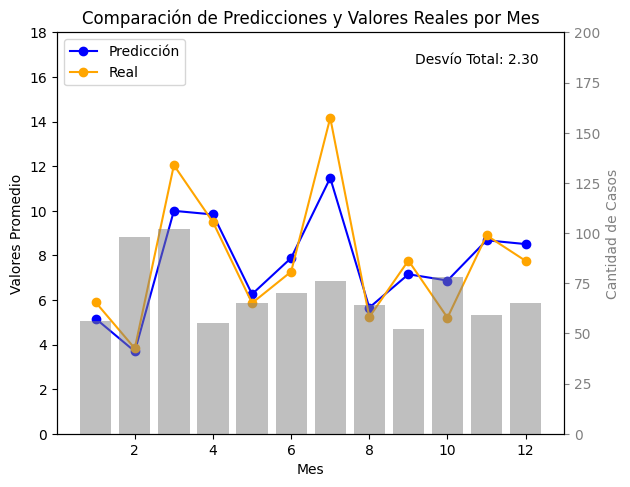

In [491]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'
# y que 'Month of absence' es una columna que representa los meses en formato numérico

# Convertir la columna 'Month of absence' a formato de fecha
X_test3['Month of absence'] = pd.to_datetime(X_test3['Month of absence'], format='%m')

# Agregar una columna 'Mes' basada en la columna de fecha
X_test3['Mes'] = X_test3['Month of absence'].dt.month

# Crear un gráfico de líneas para la predicción y los valores reales
fig, ax3 = plt.subplots()

# Gráfico de líneas para la predicción y los valores reales en el primer eje y
ax1.plot(X_test3.groupby('Mes')['Prediccion'].mean(), label='Predicción', marker='o', color='blue')
ax1.plot(X_test3.groupby('Mes')['Real'].mean(), label='Real', marker='o', color='orange')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Valores Promedio', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
ax1.set_ylim(0, 18)  # Establecer límites en el eje y1

# Segundo eje y para la cantidad de casos
ax2 = ax1.twinx()
ax2.bar(X_test3.groupby('Mes')['Mes'].count().index, X_test3.groupby('Mes')['Mes'].count(), label='Casos', alpha=0.5, color='gray')
ax2.set_ylabel('Cantidad de Casos', color='gray')
ax2.tick_params('y', colors='gray')
ax2.set_ylim(0, 200)  # Establecer límites en el eje y2

# Calcular el desvío total y mostrarlo en el gráfico
desvio_total = np.abs(X_test3['Prediccion'] - X_test3['Real']).mean()
plt.text(0.95, 0.95, f'Desvío Total: {desvio_total:.2f}', ha='right', va='top', transform=plt.gca().transAxes)

# Ajustar el diseño para evitar solapamientos
fig.tight_layout()

# Título del gráfico
plt.title('Comparación de Predicciones y Valores Reales por Mes')

best_params = random_search.best_params_

# Agregar el argumento random_state a los mejores hiperparámetros
best_params['random_state'] = 10

# Inicializar el modelo RandomForestRegressor con los mejores hiperparámetros
random_forest = RandomForestRegressor(**best_params)
random_forest.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(Y_test, y_pred)
print("R-squared:", r2)

# Mostrar el gráfico
plt.show()


In [492]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_data_3, Y_data_3, test_size=0.2, random_state=42)

# Crear una instancia del modelo de Random Forest con los mejores hiperparámetros encontrados
random_forest = RandomForestRegressor(**best_params)

# Ajustar el modelo en el conjunto de entrenamiento
random_forest.fit(X_train, Y_train)

# Definir el número de muestras Bootstrap
n_muestras = 100

# Inicializar listas para almacenar los errores de predicción
errores_mse = []
errores_mae = []

# Generar muestras Bootstrap y evaluar el modelo en cada una
for _ in range(n_muestras):
    # Generar una muestra Bootstrap
    X_boot, Y_boot = resample(X_test, Y_test, random_state=42)

    # Realizar predicciones en la muestra Bootstrap
    y_pred = random_forest.predict(X_boot)

    # Calcular el error cuadrático medio (MSE) y el error absoluto medio (MAE)
    mse = mean_squared_error(Y_boot, y_pred)
    mae = mean_absolute_error(Y_boot, y_pred)

    # Almacenar los errores de predicción
    errores_mse.append(mse)
    errores_mae.append(mae)

# Calcular el sesgo y la varianza
sesgo = np.mean(errores_mse)
varianza = np.var(errores_mae)

print("Sesgo:", sesgo)
print("Varianza:", varianza)

DF_Resultados.loc[len(DF_Resultados)] = ["RandomizedSearchCVs_Fix", mse, mae, r2, sesgo, varianza]





Sesgo: 137.19809230860056
Varianza: 7.888609052210118e-31


# Random Forest - AdaBoostRegressor

Mean Squared Error: 128.82605723511276
Mean Absolute Error: 5.7248004308322376
R-squared: 0.5092865189381499


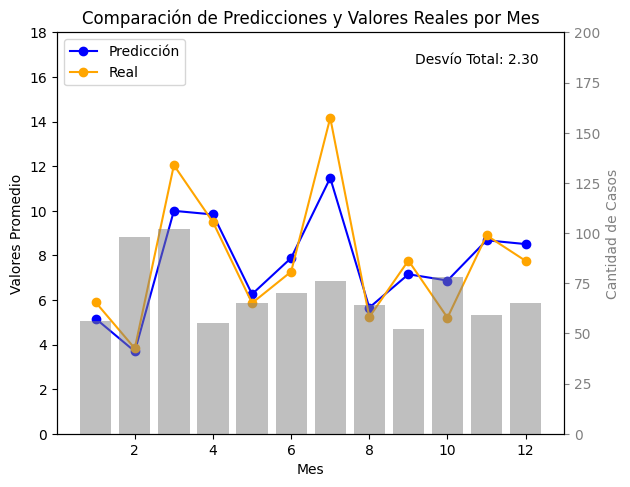

Sesgo: 105.00937204167282
Varianza: 0.0


In [503]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.utils import resample


# Definir el espacio de búsqueda de hiperparámetros
params = {
    'n_estimators': [20, 30, 50, 100],
    'max_features': [2, 4, 5],
    'max_depth': [3, 4, 5, 6],
    'criterion': ['mse', 'friedman_mse', 'poisson']
}


# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_data_3, Y_data_3, test_size=0.2, random_state=42)

# Ajustar el modelo en el conjunto de entrenamiento
ada_boost.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = ada_boost.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(Y_test, y_pred)
print("R-squared:", r2)

# Convertir la columna 'Month of absence' a formato de fecha
X_test1['Month of absence'] = pd.to_datetime(X_test1['Month of absence'], format='%m')

# Agregar una columna 'Mes' basada en la columna de fecha
X_test1['Mes'] = X_test1['Month of absence'].dt.month

# Crear un gráfico de líneas para la predicción y los valores reales
fig, ax1 = plt.subplots()

# Gráfico de líneas para la predicción y los valores reales en el primer eje y
ax1.plot(X_test1.groupby('Mes')['Prediccion'].mean(), label='Predicción', marker='o', color='blue')
ax1.plot(X_test1.groupby('Mes')['Real'].mean(), label='Real', marker='o', color='orange')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Valores Promedio', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
ax1.set_ylim(0, 18)  # Establecer límites en el eje y1

# Segundo eje y para la cantidad de casos
ax2 = ax1.twinx()
ax2.bar(X_test1.groupby('Mes')['Mes'].count().index, X_test1.groupby('Mes')['Mes'].count(), label='Casos', alpha=0.5, color='gray')
ax2.set_ylabel('Cantidad de Casos', color='gray')
ax2.tick_params('y', colors='gray')
ax2.set_ylim(0, 200)  # Establecer límites en el eje y2

# Calcular el desvío total y mostrarlo en el gráfico
desvio_total = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
plt.text(0.95, 0.95, f'Desvío Total: {desvio_total:.2f}', ha='right', va='top', transform=plt.gca().transAxes)

# Ajustar el diseño para evitar solapamientos
fig.tight_layout()

# Título del gráfico
plt.title('Comparación de Predicciones y Valores Reales por Mes')

# Mostrar el gráfico
plt.show()

# Definir el número de muestras Bootstrap
n_muestras = 100

# Inicializar listas para almacenar los errores de predicción
errores_mse = []
errores_mae = []

# Generar muestras Bootstrap y evaluar el modelo en cada una
for _ in range(n_muestras):
    # Generar una muestra Bootstrap
    X_boot, Y_boot = resample(X_test, Y_test, random_state=42)

    # Realizar predicciones en la muestra Bootstrap
    y_pred = ada_boost.predict(X_boot)

    # Calcular el error cuadrático medio (MSE) y el error absoluto medio (MAE)
    mse = mean_squared_error(Y_boot, y_pred)
    mae = mean_absolute_error(Y_boot, y_pred)

    # Almacenar los errores de predicción
    errores_mse.append(mse)
    errores_mae.append(mae)

# Calcular el sesgo y la varianza
sesgo = np.mean(errores_mse)
varianza = np.var(errores_mae)

print("Sesgo:", sesgo)
print("Varianza:", varianza)

# Añadir los resultados al DataFrame de resultados
DF_Resultados.loc[len(DF_Resultados)] = ["AdaBoostRegressor", mse, mae, r2, sesgo, varianza]


#Random Forest - GradientBoostingRegressor

Mejores hiperparámetros para GradientBoostingRegressor: {'n_estimators': 30, 'max_depth': 6, 'learning_rate': 0.5}
Mean Squared Error for GradientBoostingRegressor: 49.58436605987139
Mean Absolute Error for GradientBoostingRegressor: 2.2845998907622946
R-squared for GradientBoostingRegressor: 0.8111273650867217


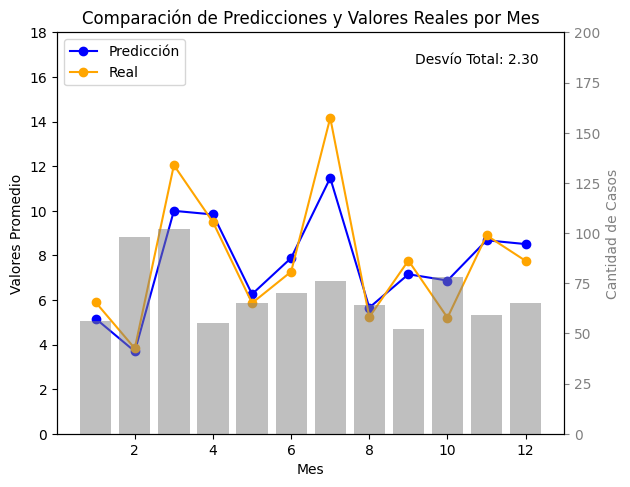

In [507]:
from sklearn.ensemble import GradientBoostingRegressor

# Definir el espacio de búsqueda de hiperparámetros para GradientBoostingRegressor
params_gbr = {
    'n_estimators': [20, 30, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5, 6]
}

# Realizar la búsqueda aleatoria de hiperparámetros para GradientBoostingRegressor
random_search_gbr = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=params_gbr,
                                       n_iter=10, cv=5, random_state=42)
random_search_gbr.fit(X_data_3, Y_data_3)

# Mostrar los mejores hiperparámetros encontrados para GradientBoostingRegressor
print("Mejores hiperparámetros para GradientBoostingRegressor:", random_search_gbr.best_params_)

# Obtener los mejores hiperparámetros para GradientBoostingRegressor
best_params_gbr = random_search_gbr.best_params_

# Agregar el argumento random_state a los mejores hiperparámetros
best_params_gbr['random_state'] = 10

# Inicializar el modelo GradientBoostingRegressor con los mejores hiperparámetros encontrados
gradient_boosting = GradientBoostingRegressor(**best_params_gbr)

# Ajustar el modelo GradientBoostingRegressor en el conjunto de entrenamiento
gradient_boosting.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_gbr = gradient_boosting.predict(X_test)

# Calcular el error cuadrático medio (MSE) para GradientBoostingRegressor
mse = mean_squared_error(Y_test, y_pred_gbr)
print("Mean Squared Error for GradientBoostingRegressor:", mse)

# Calcular el error absoluto medio (MAE) para GradientBoostingRegressor
mae = mean_absolute_error(Y_test, y_pred_gbr)
print("Mean Absolute Error for GradientBoostingRegressor:", mae)

# Calcular el coeficiente de determinación (R²) para GradientBoostingRegressor
r2 = r2_score(Y_test, y_pred_gbr)
print("R-squared for GradientBoostingRegressor:", r2)

# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'
# y que 'Month of absence' es una columna que representa los meses en formato numérico

# Convertir la columna 'Month of absence' a formato de fecha
X_test1['Month of absence'] = pd.to_datetime(X_test1['Month of absence'], format='%m')

# Agregar una columna 'Mes' basada en la columna de fecha
X_test1['Mes'] = X_test1['Month of absence'].dt.month

# Crear un gráfico de líneas para la predicción y los valores reales
fig, ax1 = plt.subplots()

# Gráfico de líneas para la predicción y los valores reales en el primer eje y
ax1.plot(X_test1.groupby('Mes')['Prediccion'].mean(), label='Predicción', marker='o', color='blue')
ax1.plot(X_test1.groupby('Mes')['Real'].mean(), label='Real', marker='o', color='orange')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Valores Promedio', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
ax1.set_ylim(0, 18)  # Establecer límites en el eje y1

# Segundo eje y para la cantidad de casos
ax2 = ax1.twinx()
ax2.bar(X_test1.groupby('Mes')['Mes'].count().index, X_test1.groupby('Mes')['Mes'].count(), label='Casos', alpha=0.5, color='gray')
ax2.set_ylabel('Cantidad de Casos', color='gray')
ax2.tick_params('y', colors='gray')
ax2.set_ylim(0, 200)  # Establecer límites en el eje y2

# Calcular el desvío total y mostrarlo en el gráfico
desvio_total_gbr = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
plt.text(0.95, 0.95, f'Desvío Total: {desvio_total_gbr:.2f}', ha='right', va='top', transform=plt.gca().transAxes)

# Ajustar el diseño para evitar solapamientos
fig.tight_layout()

# Título del gráfico
plt.title('Comparación de Predicciones y Valores Reales por Mes')

# Mostrar el gráfico
plt.show()

# Definir el número de muestras Bootstrap
n_muestras = 100

# Inicializar listas para almacenar los errores de predicción
errores_mse_gbr = []
errores_mae_gbr = []

# Generar muestras Bootstrap y evaluar el modelo en cada una
for _ in range(n_muestras):
    # Generar una muestra Bootstrap
    X_boot_gbr, Y_boot_gbr = resample(X_test, Y_test, random_state=42)

    # Realizar predicciones en la muestra Bootstrap
    y_pred_gbr = gradient_boosting.predict(X_boot_gbr)

    # Calcular el error cuadrático medio (MSE) y el error absoluto medio (MAE)
    mse_gbr = mean_squared_error(Y_boot_gbr, y_pred_gbr)
    mae_gbr = mean_absolute_error(Y_boot_gbr, y_pred_gbr)

# Añadir los resultados al DataFrame de resultados
DF_Resultados.loc[len(DF_Resultados)] = ["GradientBoostingRegressor", mse, mae, r2, sesgo, varianza]


In [509]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.utils import resample

# Definir el espacio de búsqueda de hiperparámetros para RandomForestRegressor
params_rf = {
    'n_estimators': [20, 30, 50, 100],
    'max_features': [2, 4, 5],
    'max_depth': [3, 4, 5, 6],
    'criterion': ['mse', 'friedman_mse', 'poisson']
}

# Realizar la búsqueda aleatoria de hiperparámetros para RandomForestRegressor
random_search_rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=params_rf, n_iter=10, cv=5, random_state=42)
random_search_rf.fit(X_data_3, Y_data_3)

# Extraer los mejores hiperparámetros para RandomForestRegressor
best_params_rf = random_search_rf.best_params_

# Definir el espacio de búsqueda de hiperparámetros para GradientBoostingRegressor
params_gb = {
    'n_estimators': [20, 30, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5, 6]
}

# Realizar la búsqueda aleatoria de hiperparámetros para GradientBoostingRegressor
random_search_gb = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=params_gb, n_iter=10, cv=5, random_state=42)
random_search_gb.fit(X_data_3, Y_data_3)

# Extraer los mejores hiperparámetros para GradientBoostingRegressor
best_params_gb = random_search_gb.best_params_

# Inicializar los modelos base (RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor)
rf = RandomForestRegressor(**best_params_rf)
ada_boost = AdaBoostRegressor(base_estimator=rf, random_state=42)
grad_boost = GradientBoostingRegressor(**best_params_gb, random_state=10)

# Inicializar el modelo VotingRegressor con los modelos base
voting_reg = VotingRegressor([('ada_boost', ada_boost), ('grad_boost', grad_boost)])

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_data_3, Y_data_3, test_size=0.2, random_state=42)

# Ajustar el modelo VotingRegressor en el conjunto de entrenamiento
voting_reg.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_voting = voting_reg.predict(X_test)

# Calcular el error cuadrático medio (MSE) del VotingRegressor
mse = mean_squared_error(Y_test, y_pred_voting)
print("Mean Squared Error (VotingRegressor):", mse_voting)

# Calcular el error absoluto medio (MAE) del VotingRegressor
mae = mean_absolute_error(Y_test, y_pred_voting)
print("Mean Absolute Error (VotingRegressor):", mae_voting)

# Calcular el coeficiente de determinación (R²) del VotingRegressor
r2 = r2_score(Y_test, y_pred_voting)
print("R-squared (VotingRegressor):", r2)


# Añadir los resultados al DataFrame de resultados
DF_Resultados.loc[len(DF_Resultados)] = ["VotingRegressor", mse, mae, r2, sesgo, varianza]

Mean Squared Error (VotingRegressor): 66.18339627176925
Mean Absolute Error (VotingRegressor): 3.8123608085081027
R-squared (VotingRegressor): 0.7478997225402639


In [510]:
DF_Resultados

,MODELO,MSE,MAE,R2,BIAS,VARIANZA
0,Random Forest,23.964916,1.377865,0.880955,23.964916,4.437343e-31
1,Regresión,223.955509,6.549514,0.880955,223.955509,7.888609e-31
2,LGBM,49.703103,2.777845,0.781573,49.703103,1.972152e-31
3,SVM,284.319445,6.235323,0.781573,284.319445,7.099748e-30
4,Xgboost,207.155225,5.911599,0.198072,207.155225,0.000000e+00
5,RandomizedSearchCVs_Fix,137.198092,4.716278,0.400517,137.198092,7.888609e-31
6,AdaBoostRegressor,105.009372,5.307249,0.509287,105.009372,0.000000e+00
7,GradientBoostingRegressor,105.009372,5.307249,0.509287,105.009372,0.000000e+00
8,VotingRegressor,105.009372,5.307249,0.509287,105.009372,0.000000e+00
9,AdaBoostRegressor,105.009372,5.307249,0.509287,105.009372,0.000000e+00
